Todo: velká/malá!

In [108]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd

In [109]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [110]:
df = pd.read_parquet("data/cnb_vyber.parquet")

In [111]:
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))

In [112]:
df = df[df['rok'].notnull()]

In [113]:
df.columns

Index(['008', '020_a', '020_c', '020_q', '041_a', '041_h', '041_ind1', '044_a',
       '072_a', '072_x', '080_a', '100_4', '100_7', '100_a', '100_d', '240_l',
       '245_a', '245_c', '245_n', '245_p', '246_a', '250_a', '250_b', '260_a',
       '260_b', '260_c', '260_e', '260_f', '260_ind1', '264_a', '264_b',
       '264_c', '264_ind2', '300_a', '300_b', '300_c', '490_a', '490_v',
       '500_a', '520_a', '520_b', '521_a', '546_a', '648_a', '650_a', '650_x',
       '650_y', '650_z', '651_a', '653_a', '655_a', '700_4', '700_7', '700_a',
       '700_d', '710_4', '710_7', '710_a', '710_b', '830_a', '928_a', '964_a',
       'leader', 'rok'],
      dtype='object')

In [114]:
df.sample(10)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20193074176,190103s2018 xr a g 000 p cze d,[978-80-7557-164-9],None,[(vázáno)],None,None,None,None,[821.162.3-1],[Česká poezie],"[821.162.3-1, (0:82-1)]","[aut, pht]",ola2010548258,"Prokopová, Ivana,",1960-,None,Slunce na sněhu /,Ivana Prokopová,None,None,None,[První vydání],None,None,None,None,None,None,None,[Praha :],"[Epocha,]",[2018],[1],[53 stran :],[ilustrace ;],[19 cm],None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[česká poezie, Czech poetry]",None,None,"[Prokopová, Ivana,]",[1960-],None,None,None,None,None,None,None,cam a22 i 4500,2018.0
nkc20091855927,090211s2009 xr a g 000 j cze,[978-80-7399-685-7],None,[(brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-3)]",[aut],jk01083016,"Němcová, Božena,",1820-1862,None,V zámku a podzámčí /,Božena Němcová ; [ilustrovala Zuzana Bahulová],None,None,None,[V Tribunu EU vyd. 2.],None,[Brno :],"[Tribun EU,]",[2009],None,None,None,None,None,None,None,[85 s. :],[il. ;],[21 cm],[Knihovnicka.cz],None,None,None,None,None,None,None,None,None,None,None,None,None,"[české prózy, Czech prose]",None,None,None,None,None,None,None,None,[Knihovnicka.cz],None,None,nam a22 a 4500,2009.0
cpk20031251038,030801s2003 xr e 000 1 cze,[80-7193-146-2],"[Kč 190,00]",[(brož.) :],[cze],[pol],1,None,[821.162.1],[Polská literatura],"[821.162.1-31, (0:82-311.9)]",[aut],js20011212090,"Kres, Feliks W.,",1966-,None,Král Nesmírna /,Feliks W. Kres ; [překlad Pavel Weigel],None,None,None,[Vyd. 1.],None,[Plzeň :],"[Laser,]",[2003],None,None,None,None,None,None,None,[471 s. ;],None,[17 cm],"[PoDíl SF/F ;, Fantasy ;]","[5, sv. 63]",[Přeloženo z polštiny],None,None,None,None,None,None,None,None,None,None,None,"[vědecko-fantastické romány, polské romány, sc...",None,None,None,None,None,None,None,None,"[PoDíl SF/F, Fantasy (Laser)]",None,None,nam a22 a 4500,2003.0
nkc20152724261,150812s2015 xr a g 000 p cze,[978-80-87595-43-5],None,[(vázáno)],[cze],[eng],1,None,[821.111-1],"[Anglická poezie, anglicky psaná]","[821.111-1, 17, (0:82-1)]",[aut],jn19990004353,"Kipling, Rudyard,",1865-1936,Česky,Když /,Rudyard Kipling ; [ilustroval] Giovanni Manna ...,None,None,None,None,None,None,None,None,None,None,None,[[Havlíčkův Brod] :],"[Petrkov,]",[2015],[1],[39 nečíslovaných stran :],[barevné ilustrace ;],[18 cm],None,None,[Přeloženo z angličtiny],None,None,None,None,None,"[etika, ethics]",None,None,None,None,None,"[anglická poezie, English poetry]","[trl, ill]","[jk01042858, xx0051791]","[Hron, Zdeněk,, Manna, Giovanni,]","[1944-, 1966-]",None,None,None,None,None,[Novotný Petr - Petrkov],None,nam a22 i 4500,2015.0
nkc20091964592,090717s2009 xr a b 000 f cze,[978-80-204-1999-6],None,[(váz.)],None,None,None,None,"[395, 0/9-053.2]","[Společenské chování. Etiketa, Literatura pro ...","[395, 37.034, (0:82-34), (0.053.2)]",[aut],xx0012658,"Krolupperová, Daniela,",1969-,None,"Draka je lepší pozdravit, aneb, O etiketě /","Daniela Krolupperová, Miloš Kratochvíl ; inspi...",None,None,[O etiketě],[1. vyd.],None,[Praha :],"[Mladá fronta,]",[2009],None,None,None,None,None,None,None,[132 s. :],[barev. il. ;],[24 cm],None,None,None,None,None,[Pro děti od 5 let],None,None,"[etiketa, etická výchova, etiquette, ethical e...",None,None,None,None,None,"[pohádky, publikace pro děti, fairy tales, chi...","[aut, oth, ill]","[jk01062996, js20050711002, xx0028719]","[Kratochvíl, Miloš,, Hašková-Coolidge, Eliška,...","[1948-, 1941-, 1968-]",None,None,None,None,None,None,None,nam a22 a 4500,2009.0
bknaus11082,020519s1921 xr ||| | cze,None,None,None,[cze],[rus

In [115]:
df['650_x'].sample(50)

001
nkc20112195075                                                  None
bk194201941                                                     None
bk197605011                                                     None
nos190106976005                                                 None
ck8302768                                                       None
nkc20203179489                                                  None
nkc20142607815     [None, environmentální aspekty, None, None, No...
nkc20213351857                                                  None
bk194804995                                                     None
np9418775                                                       None
cpk20000970516                                                  None
nkc20203180782                                                  None
nkc20122380384                                                  None
nkc20203221159                                                  None
cpk20000965920          [None,

In [116]:
df3 = df[['rok','072_x','245_a','245_c','520_a','650_a','653_a','655_a','964_a']].sort_values(by='rok')

In [117]:
df3.explode('072_x').groupby('072_x').size().nlargest(30)

072_x
Učební osnovy. Vyučovací předměty. Učebnice               52554
Česká próza                                               43396
Literatura pro děti a mládež (beletrie)                   36999
Biografie                                                 25311
Americká próza                                            18728
Anglická próza, anglicky psaná                            16116
Česká poezie                                              15864
Milostná, dobrodružná, fantastická próza                  15790
Literatura pro děti a mládež (naučná)                     13437
Dějiny Česka a Slovenska                                   7418
Sport. Hry. Tělesná cvičení                                7395
Patologie. Klinická medicína                               7128
Kuchařství. Potraviny. Vařená jídla                        6262
Německá próza, německy psaná                               5925
Architektura                                               5903
Vojenství. Obrana země. Ozbrojené 

In [118]:
df3.explode('653_a').groupby('653_a').size().nlargest(30)

653_a
Česká republika            695
sčítání obyvatelstva       670
sčítání bytů               581
sčítání domácností         578
sčítání domů               572
Československo             440
česká próza                382
dějiny                     380
denní četba                311
česká poezie               281
demografická statistika    259
jazyková úroveň A2         201
stol. 20., léta 90.        198
čeština jako cizí jazyk    189
křesťanský život           188
jazyková úroveň A1         182
sídelní jednotky           178
světová válka 2.           176
čeština                    173
matematika                 162
duchovní život             141
jazyková úroveň B1         138
české země                 138
politický vývoj            132
vlastivěda                 121
české pohádky              118
obce                       110
česká literatura           110
základní školy             105
firmy                      102
dtype: int64

In [119]:
df3.explode('650_a').groupby('650_a').size().nlargest(30)

650_a
čeština                            8240
Czech language                     6318
druhá světová válka (1939-1945)    4837
World War (1939-1945)              3736
matematika                         3571
křesťanský život                   3507
biblické citáty                    3294
angličtina                         2767
Christian life                     2737
Biblical quotations                2727
oborová terminologie               2598
mathematics                        2555
kultura a společnost               2484
každodenní život                   2483
čeští spisovatelé                  2450
česká literatura                   2415
Bůh a člověk                       2377
sebepoznání                        2312
fauna                              2298
účetnictví                         2244
everyday life                      2241
management                         2203
české malířství                    2166
architektonické památky            2163
cesty a pobyt                     

In [120]:
porevoluci = tema_poprve[tema_poprve > 1989].index.to_list()
porevoluci

['"normalization" (1969-1989 : Czechoslovakia)',
 '"normalization", Czechoslovakia, 1968-1989',
 '"normalization", Czechoslovakia, 1969-1989',
 "'ndrangheta",
 '1. ročník ZŠ',
 '131 (locomotives)',
 '131 (lokomotivy)',
 '141 (locomotives)',
 '141 (lokomotivy)',
 '16. stol.',
 '1919-1993',
 '1993-1999',
 '2-chlorodeoxyadenosin',
 '2. ročník ZŠ',
 '21. století',
 '360-degree feedback',
 '360stupňová zpětná vazba',
 '363 (locomotives)',
 '363 (lokomotivy)',
 '387.0 (lokomotivy)',
 '3D Studio 4.0',
 '3D Studio 4.0 (software)',
 '3D Studio MAX',
 '3D Studio MAX (computer file)',
 '3D Studio MAX (software)',
 '3D Studio MAX 2',
 '3D Studio MAX 2 (software)',
 '3D Studio MAX 3',
 '3D Studio MAX 3 (software)',
 '3D Studio MAX 4',
 '3D Studio MAX 4 (software)',
 '3D Studio MAX 5 (software)',
 '3D Studio MAX 6',
 '3D Studio MAX 6 (software)',
 '3D Studio MAX 7',
 '3D Studio MAX 7 (software)',
 '3D Studio MAX 8',
 '3D Studio MAX 8 (software)',
 '3D Studio VIZ',
 '3D Studio VIZ (software)',
 '3D S

In [121]:
tema_poprve = df3.explode('650_a').groupby('650_a')['rok'].min()
tema_valikost = df3.explode('650_a').groupby('650_a').size()

In [122]:
temata_650 = df3.explode('650_a')
pozdejsi = tema_poprve[tema_poprve >= 1945].index.to_list()
vetsi = tema_valikost[tema_valikost >= 10].index.to_list()

In [123]:
poletech = []
for rok in range(1945,2024):
    rocnik = {}
    tehdy_poprve = tema_poprve[tema_poprve == rok].index.to_list()
    nejvetsi_tehdejsi = temata_650[temata_650['650_a'].isin(tehdy_poprve)].groupby('650_a').size().nlargest(1).index.to_list()[0]
    rocnik['rok'] = rok
    rocnik['nejvetsi'] = nejvetsi_tehdejsi
    poletech.append(rocnik)

In [124]:
pd.DataFrame(poletech)

,rok,nejvetsi
0,1945,concentration camps
1,1946,holocaust (1939-1945)
2,1947,preschool children
3,1948,soccer
4,1949,finanční management
5,1950,odborné předměty
6,1951,educational programs
7,1952,hlavolamy
8,1953,výpočetní technika
9,1954,animal training


In [125]:
tema_poprve2 = df3.explode('072_x').groupby('072_x')['rok'].min()

In [126]:
temata_072 = df3.explode('072_x')

In [127]:
poletech = []
for rok in range(1945,2024):
    rocnik = {}
    rocnik['rok'] = rok
    tehdy_poprve = tema_poprve2[tema_poprve2 == rok].index.to_list()
    try:
        nejvetsi_tehdejsi = temata_072[temata_072['072_x'].isin(tehdy_poprve)].groupby('072_x').size().nlargest(1).index.to_list()[0]
        rocnik['nejvetsi'] = nejvetsi_tehdejsi
    except:
        rocnik['nejvetsi'] = None
    poletech.append(rocnik)

In [128]:
pd.DataFrame(poletech)

,rok,nejvetsi
0,1945,Italská literatura
1,1946,None
2,1947,None
3,1948,None
4,1949,Automatizační a řídicí technika
5,1950,Biotechnologie. Genetické inženýrství
6,1951,Jaderná technika
7,1952,None
8,1953,Sino-tibetské literatury (o nich)
9,1954,Počítače. Hardware


In [129]:
temata_650[temata_650['650_a'].isin(porevoluci)].groupby('650_a').size().nlargest(50)

650_a
channeling                          886
programs and projects               810
regional development                693
positive thinking                   629
special education                   609
sustainable development             565
counting                            538
environmental education             537
communication skills                527
educational projects                513
historical postcards                512
e-learning                          511
personnel management                505
social service                      494
internet                            463
evropské právo                      457
integrovaná výchova a vzdělávání    432
people with disabilities            425
European law                        424
dinosauři                           418
tourism                             416
dinosaurs                           403
integrated education                399
Internet                            389
globalizace                       

In [130]:
temata_650[(temata_650['650_a'].isin(pozdejsi)) & (temata_650['650_a'].isin(vetsi))]

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
bknvla00795,1945.0,[Česká poezie],Touha volyňských Čechů po vlasti /,Josef Toman,None,volynští Češi,None,[česká poezie],None
bknvla00792,1945.0,[Česká poezie],Touha volyňských Čechů po vlasti /,Josef Toman,None,volynští Češi,None,[česká poezie],None
bk194501135,1945.0,[Dějiny Česka a Slovenska],Lidice :,[podle úředních pramenů napsal Vlastimil Louda...,None,"vyhlazení Lidic (1942 : Lidice, Česko)",None,[dokumenty],None
bk194501135,1945.0,[Dějiny Česka a Slovenska],Lidice :,[podle úředních pramenů napsal Vlastimil Louda...,None,válečné zločiny,None,[dokumenty],None
bk194501135,1945.0,[Dějiny Česka a Slovenska],Lidice :,[podle úředních pramenů napsal Vlastimil Louda...,None,zločiny nacismu,None,[dokumenty],None
...,...,...,...,...,...,...,...,...,...
nkc20243606944,2024.0,[Zemědělství. Pedologie. Agrotechnika. Agroeko...,Půda :,Miloslav Šimek,None,půdní organismy,None,"[populárně-naučné publikace, obrazové publikac...",None
nkc20243606944,2024.0,[Zemědělství. Pedologie. Agrotechnika. Agroeko...,Půda :,Miloslav Šimek,None,soil,None,"[populárně-naučné publikace, obrazové publikac...",None
nkc20243606944,2024.0,[Zemědělství. Pedologie. Agrotechnika. Agroeko...,Půda :,Miloslav Šimek,None,soil ecology,None,"[populárně-naučné publikace, obrazové publikac...",None


In [131]:
temata_650.groupby('650_a')['rok'].min().sort_values()

650_a
instituce a organizace          1900.0
vlastenectví                    1900.0
zvyky a obyčeje                 1900.0
zvykové právo                   1900.0
právo                           1900.0
                                 ...  
nedžang jóga                    2024.0
prezidentky                     2024.0
plastics finishing              2024.0
science-fiction novellas        2024.0
associations of bibliophiles    2024.0
Name: rok, Length: 65879, dtype: float64

In [132]:
df3.explode('650_a').groupby('650_a')['rok'].min()

650_a
"normalization" (1969-1989 : Czechoslovakia)    1990.0
"normalization", Czechoslovakia, 1968-1989      2002.0
"normalization", Czechoslovakia, 1969-1989      1995.0
'ndrangheta                                     2010.0
1. ročník ZŠ                                    1996.0
                                                 ...  
žíla rudní                                      1978.0
žíly                                            2009.0
žíly dolních končetin                           1957.0
žížalovití                                      2011.0
žížaly                                          2002.0
Name: rok, Length: 65879, dtype: float64

In [173]:
df3.explode('964_a').groupby('964_a').size().nlargest(20)

964_a
Pohádky                                          395
Básně                                            323
Praha - výstavy výtvarné                         298
Kuchařky (knihy)                                 291
Bibliofilie (tisky)                              201
Hry divadelní                                    189
Veselohry                                        175
Pohádky moderní                                  172
Povídky                                          157
Pohádky české                                    141
Matematika vyšší - učebnice vysokoškol.          138
Fyzika - učebnice vysokoškol.                    135
Podniky průmyslové - dějiny                      134
Hry loutkové                                     132
Básně lyrické                                    131
Brno - výstavy výtvarné                          117
pohádky české - publikace pro děti               107
Geometrie deskriptivní - učebnice vysokoškol.     94
Pohádky - hry loutkové                  

In [227]:
df2 = df[['rok','072_x','245_a','245_c','520_a','650_a','653_a','655_a','964_a']].astype(str).sort_values(by='rok')

In [271]:
df2['rok'] = pd.to_numeric(df2['rok'])

In [287]:
def r(frejm):
    return frejm.groupby('rok').size().reindex([x for x in range(1900,2025)]).fillna(0).plot.bar(figsize=(25,5))

In [230]:
df2['rok'].iloc[0]

'1900'

In [231]:
df2

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
cpk20041299307,1900,['Práce'],Co má znáti obchodní pomocník /,vydala Českoslovanská Obchodnická Beseda v Praze,None,['zaměstnanci' 'pracovněprávní vztahy' 'obchod...,None,['příručky'],None
bkn20021112105,1900,None,Princ Dedal :,ilustroval K.V. Muttich,None,None,None,None,None
bknjje08487,1900,['Česká poezie'],Jak ledy plavaly-- /,Jiří Luděk Moravský,None,None,None,['česká poezie'],None
bkn20021112103,1900,['Česká próza' 'Literatura pro děti a mládež (...,Povídky z výměnku /,české mládeži vypráví F.J. Andrlík,None,None,None,['české povídky' 'publikace pro mládež'],None
cpk20021183492,1900,['Fyzioterapie. Psychoterapie. Alternativní lé...,"Kneippovo léčení, neboli stručné pojednání o j...",napsal J. Ježek,None,['lidové léčitelství'],None,['příručky'],None
...,...,...,...,...,...,...,...,...,...
nkc20243601102,2024,"['Německá poezie, německy psaná']",Seyfriedovy runy a další vzpomínky na germánsk...,"Karl Maria Wiligut, Anton Vrbka ; z německého ...",None,['germánská mytologie' 'Germanic mythology'],None,['rakouská poezie' 'komentovaná vydání' 'Austr...,None
nkc20243601094,2024,['Patologie. Klinická medicína'],Gastroenterologie :,"autoři: Radek Kroupa, Jiří Cyrany, Jiří Dolina...",None,['gastroenterologie' 'diagnostika (lékařství)'...,None,['metodické příručky' 'methodological manuals'],None
nkc20243601149,2024,['Literatura pro děti a mládež (beletrie)'],Červená Karkulka ;,None,['Bohatě ilustrované leporelo obsahuje převypr...,None,None,['pohádky' 'leporela' 'publikace pro děti' 'fa...,None


In [ ]:
r(df2[df2.apply(lambda row: any("BASIC" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("gay" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("ADHD" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("eurodiverg" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("Asperg" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("HIV" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("AIDS" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("konop" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("marihuan" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("drog" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("kyberneti" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("youtube" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("sadomaso" in str(value).lower() for value in row), axis=1)])

In [ ]:
df2[df2.apply(lambda row: any("sadomaso" in str(value).lower() for value in row), axis=1)].head(2)

In [ ]:
r(df2[df2.apply(lambda row: any("Babiš" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("neoliber" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("linux" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("tantr" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("družst" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("kolchoz" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("gorodk" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("jóga" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("narkom" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("rozvod" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("potrat" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("pohlavní" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("homosex" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("bezmas" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("vegetar" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("vražd" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("milen" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("milenk" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("cyberpunk" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("bohatstv" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("špion" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("milionář" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("miliardář" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("oligarch" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("kapitalis" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("mickey" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("zásnub" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("paranormáln" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("teroris" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("koncentrační" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("pornog" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("uprchlí" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("UFO" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("pionýr" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("skaut" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("bylin" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("konspirac" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("spiknutí" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("přírodní" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("matrix" in str(value).lower() for value in row), axis=1)])

<Axes: xlabel='rok'>

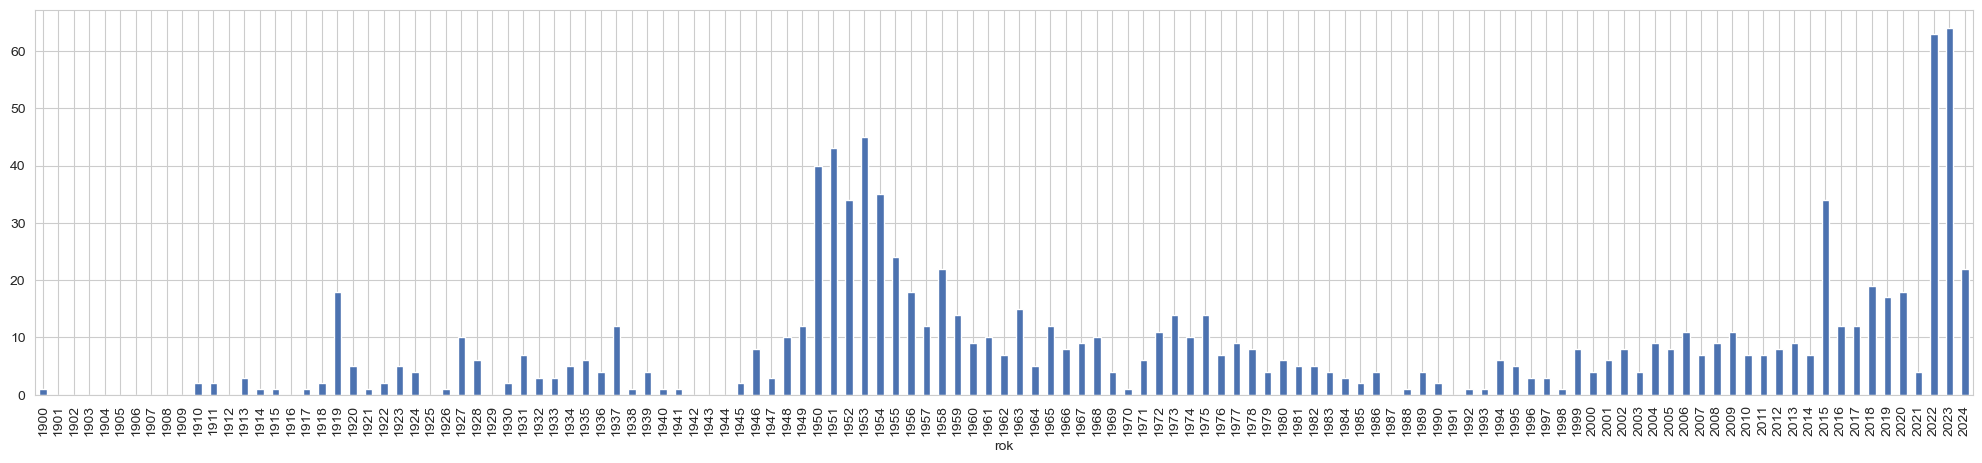

In [289]:
r(df2[df2.apply(lambda row: any("ukrajin" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("minecraft" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("roblox" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("Unix" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("algoritm" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("fašis" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("queer" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("automob" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("BDSM" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("turist" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("cyklist" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("lesbi" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("gay" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("hokej" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("internet" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("olympi" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("spartaki" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("parkinsonov" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("buržoa" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("ADHD" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("adrenalin" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("hippi" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("podnika" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("beatn" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("ekonomi" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("sametov" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("partyz" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("socialis" in str(value).lower() for value in row), axis=1)])

In [315]:
budoucnost = df2[(df2.apply(lambda row: any("budoucnost" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
minulost = df2[(df2.apply(lambda row: any("minulost" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Axes: xlabel='rok'>

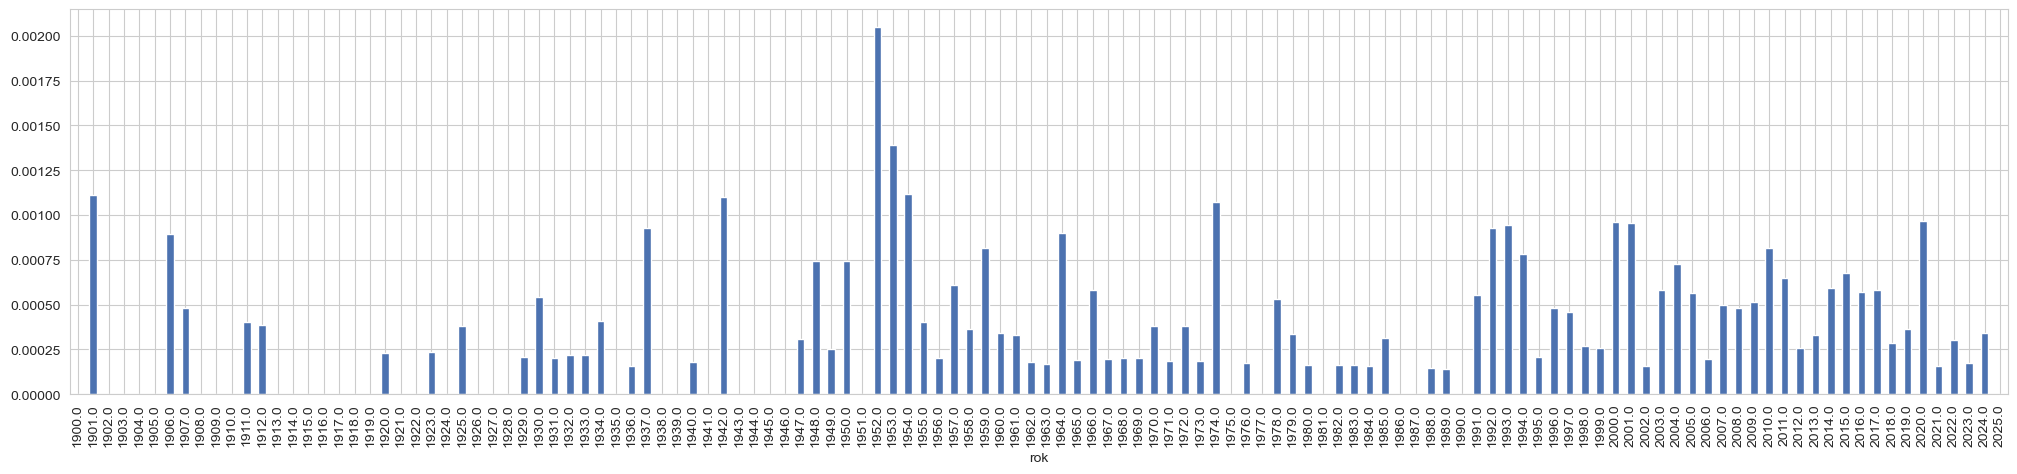

In [298]:
rakovin.plot.bar(figsize=(25,5))

In [ ]:
zbohatn = df2[(df2.apply(lambda row: any("zbohatn" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [273]:
komunis = df2[(df2.apply(lambda row: any("komunis" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("socialis" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [309]:
kapitalis = df2[(df2.apply(lambda row: any("kapitalis" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("tržn" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [275]:
fasis = df2[(df2.apply(lambda row: any("fašis" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Axes: xlabel='rok'>

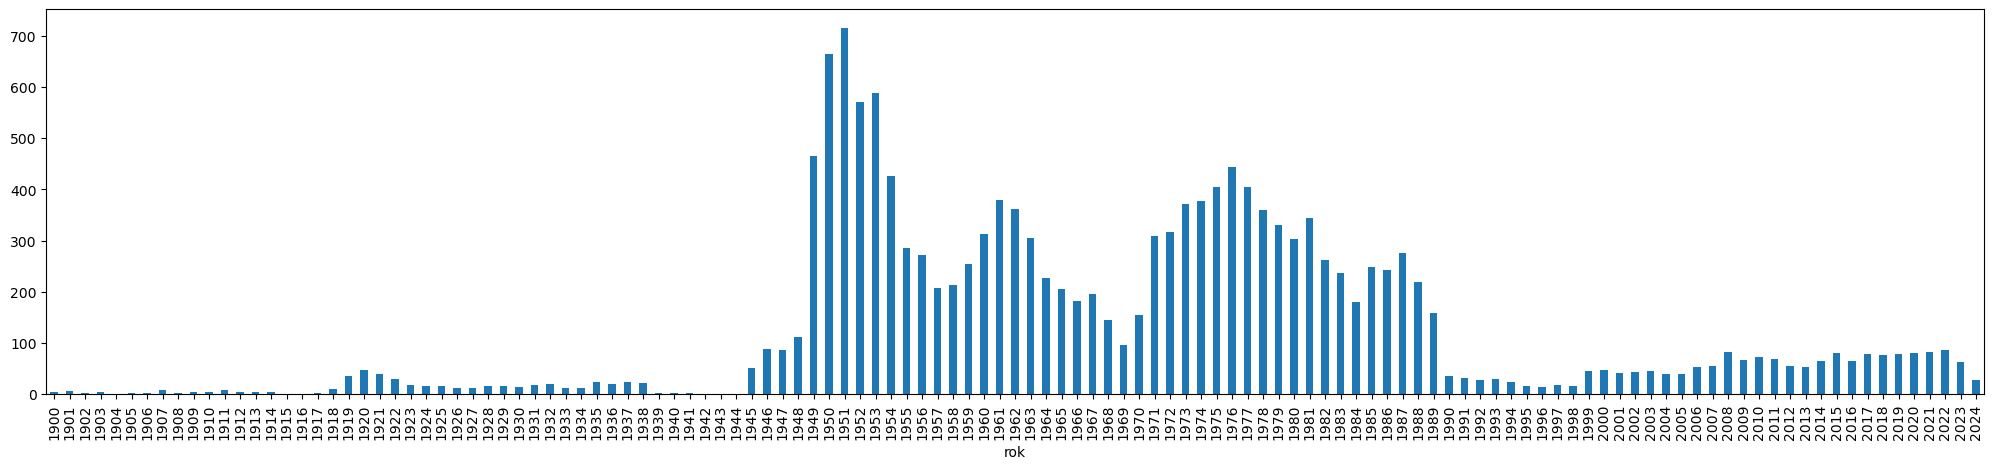

In [234]:
r(komunis)

<Axes: xlabel='rok'>

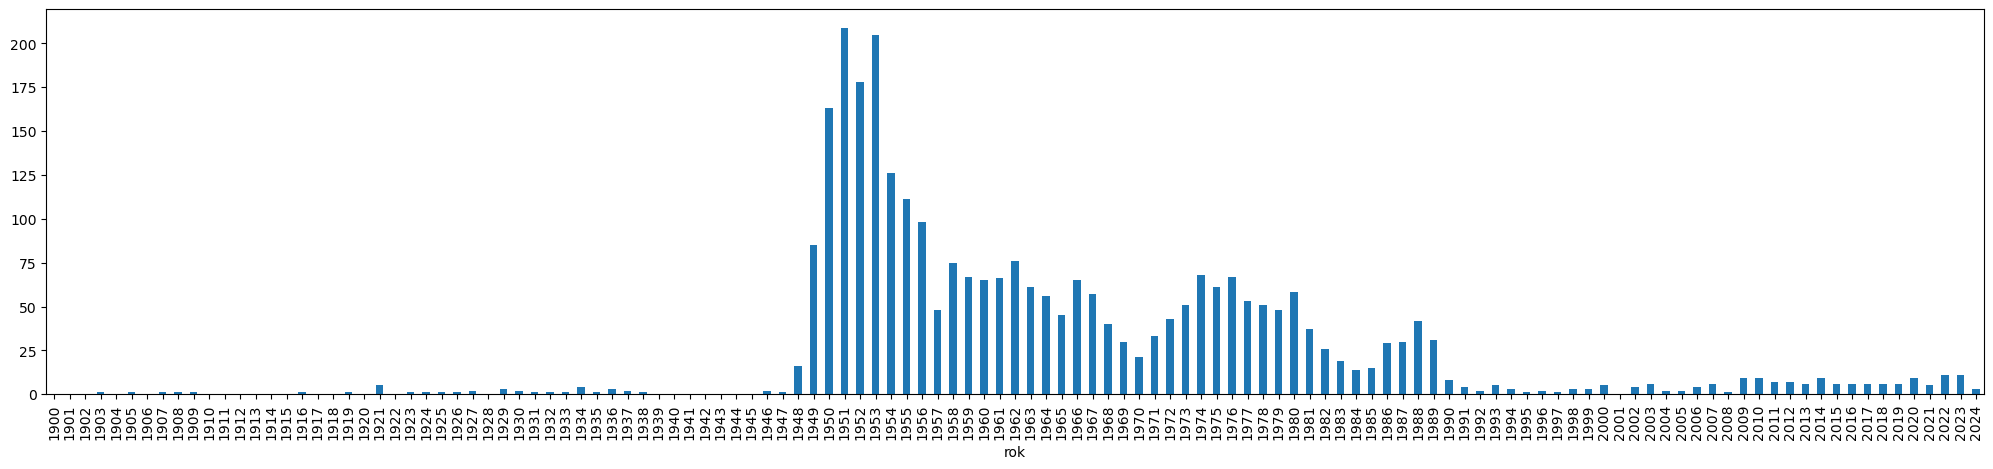

In [245]:
r(kapitalis)

In [249]:
kapitalis

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
nos190122100,1903,None,Kapesní zápisní kalendář Kompas pro soukromník...,None,None,None,None,None,None
cpk19960181513,1905,['Ekonomie'],Vývoj k socialismu =,Emile Vandervelde ; přeložil Alois Šašek,None,['socialismus' 'kapitalismus'],None,['srovnávací studie'],None
nos190154707,1907,None,Rozmach kapitalismu a majetek církve :,naps. Rudolf Vrba,None,None,None,None,None
nos190239869,1908,None,Dozorci a horníci v otrockých službách velkoka...,Z vlastní zkušenosti líčí František Richter,None,None,None,None,None
cpk19990652195,1909,['Ekonomie'],Zlaté tele :,dle různých pramenů upravil J. D. Světelský,None,['kapitalismus' 'kapitalismus' 'Židé' 'finance'],None,['brožury'],None
...,...,...,...,...,...,...,...,...,...
nkc20233580081,2023,['Ekonomie'],Budoucnost je nerůst :,"Matthias Schmelzer, Andrea Vetter, Aaron Vansi...",None,['ekonomický růst' 'solidární ekonomika' 'anti...,None,['populárně-naučné publikace' 'popular works'],None
nkc20233576458,2023,['Východoslovanské literatury'],Depeche Mode /,Serhij Žadan ; přeložil Miroslav Tomek,['Serhij Žadan ve svém prvním románu Depeche M...,None,None,['ukrajinské romány' 'Ukrainian fiction'],None
nkc20243591796,2024,['Sociologie'],Revoluce pro život :,Eva von Redecker ; z německého originálu Revol...,None,['protestní hnutí' 'sociologické teorie' 'filo...,None,['pojednání' 'essays'],None


In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

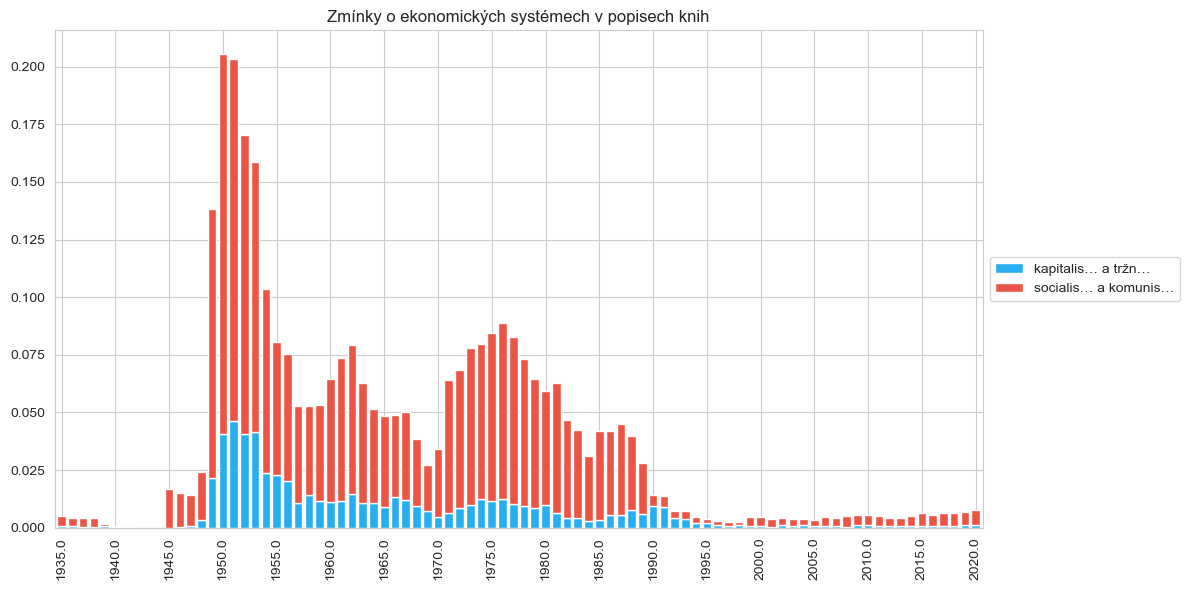

In [313]:
plt.figure(figsize=(10, 6))

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'kapitalis… a tržn…': kapitalis, 'socialis… a komunis…': komunis}).tail(91).head(86)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)

# Customize the chart
plt.title('Zmínky o ekonomických systémech v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [323]:
dinosauri = df2[(df2.apply(lambda row: any("dinosau" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
mimozems = df2[(df2.apply(lambda row: any("mimozems" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 1000x600 with 0 Axes>

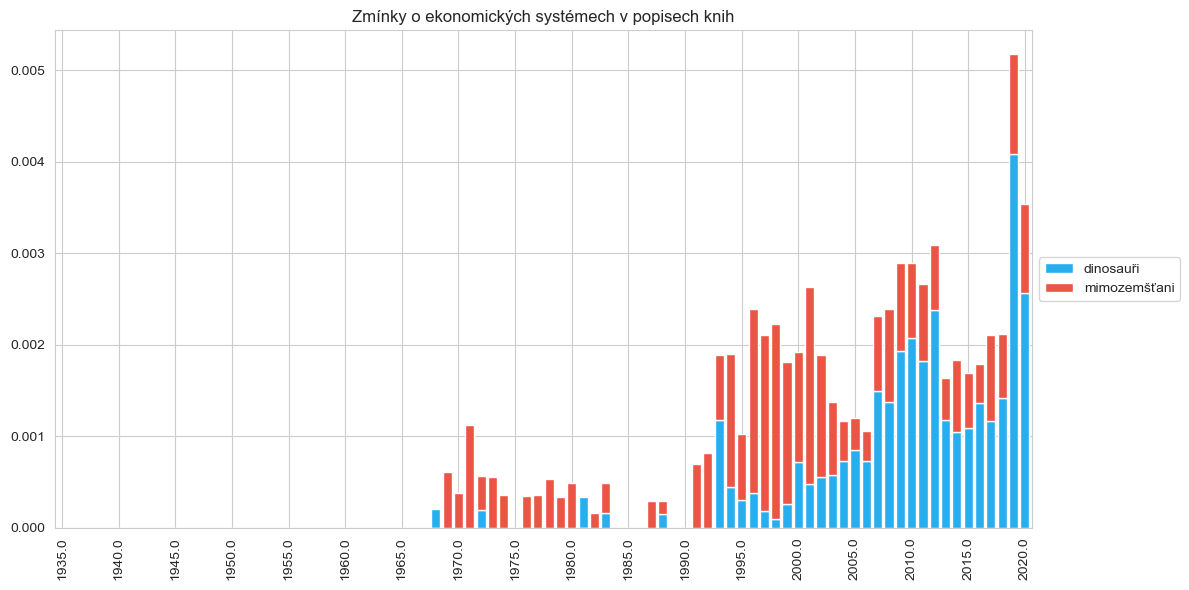

In [324]:
plt.figure(figsize=(10, 6))

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'dinosauři': dinosauri, 'mimozemšťani': mimozems}).tail(91).head(86)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)

# Customize the chart
plt.title('Zmínky o ekonomických systémech v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [331]:
televiz = df2[(df2.apply(lambda row: any("televiz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
internet = df2[(df2.apply(lambda row: any("internet" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 1000x600 with 0 Axes>

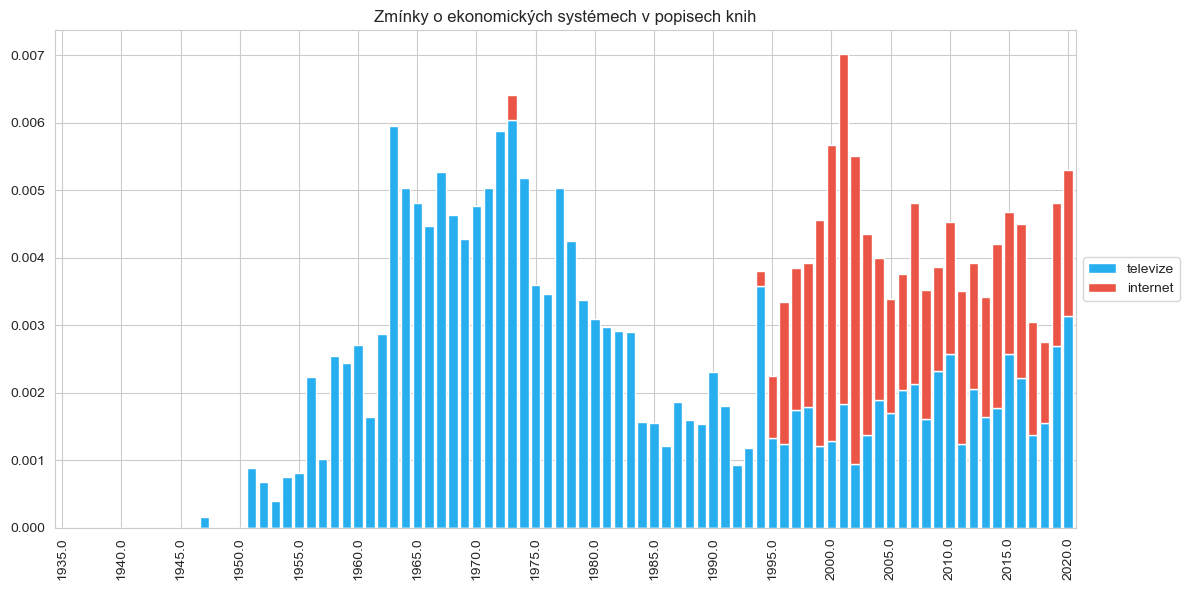

In [332]:
plt.figure(figsize=(10, 6))

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'televize': televiz, 'internet': internet}).tail(91).head(86)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)

# Customize the chart
plt.title('Zmínky o ekonomických systémech v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [452]:
skaut = df2[(df2.apply(lambda row: any("skaut" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("junák" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
pionyr = df2[(df2.apply(lambda row: any("pioný" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 640x480 with 0 Axes>

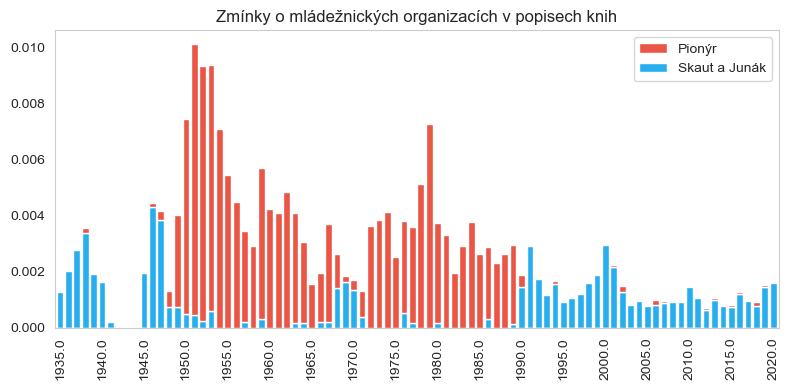

In [ ]:
plt.figure()

# Set Seaborn style
# sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'Skaut a Junák': skaut, 'Pionýr': pionyr}).tail(91).head(86)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)
ax.grid(False)

# Customize the chart
plt.title('Zmínky o mládežnických organizacích v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [372]:
vegetar = df2[(df2.apply(lambda row: any("vegetar" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("bezmas" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
grilo = df2[(df2.apply(lambda row: any("grilova" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("grilu" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [376]:
vepřo = df2[(df2.apply(lambda row: any("vepřo" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [380]:
krasobrus = df2[(df2.apply(lambda row: any("krasobrus" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [381]:
florbal = df2[(df2.apply(lambda row: any("florbal" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [392]:
produktiv = df2[(df2.apply(lambda row: any("produktiv" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("efektiv" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

In [398]:
relax = df2[(df2.apply(lambda row: any("relax" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("odpočin" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("odpočív" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 640x480 with 0 Axes>

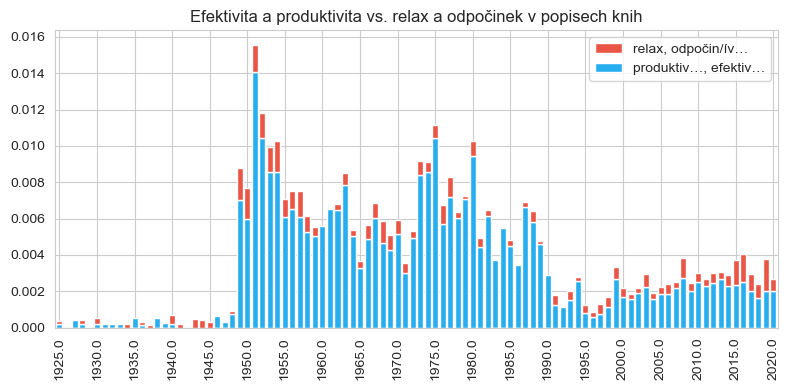

In [410]:
plt.figure()

# Set Seaborn style
# sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'produktiv…, efektiv…': produktiv, 'relax, odpočin/ív…': relax}).tail(101).head(96)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)
# ax.grid(False)

# Customize the chart
plt.title('Efektivita a produktivita vs. relax a odpočinek v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [406]:
stres = df2[(df2.apply(lambda row: any("stres" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Axes: xlabel='rok'>

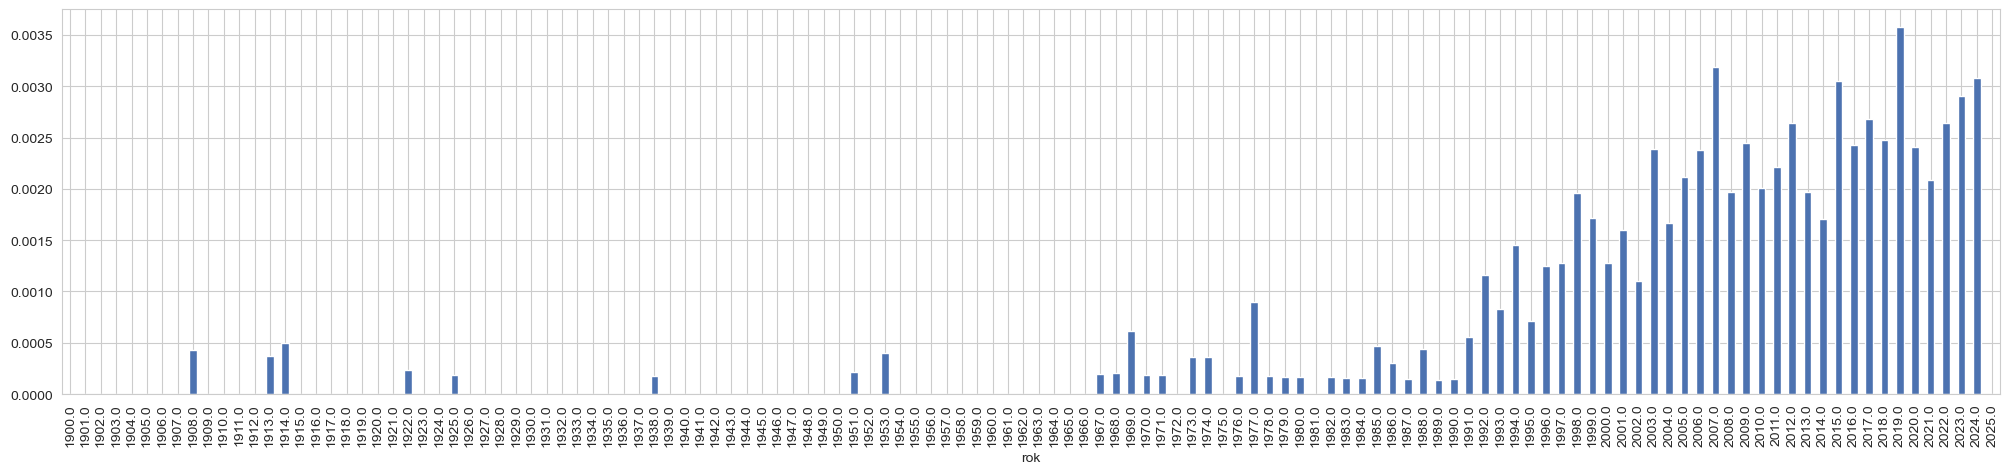

In [407]:
stres.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

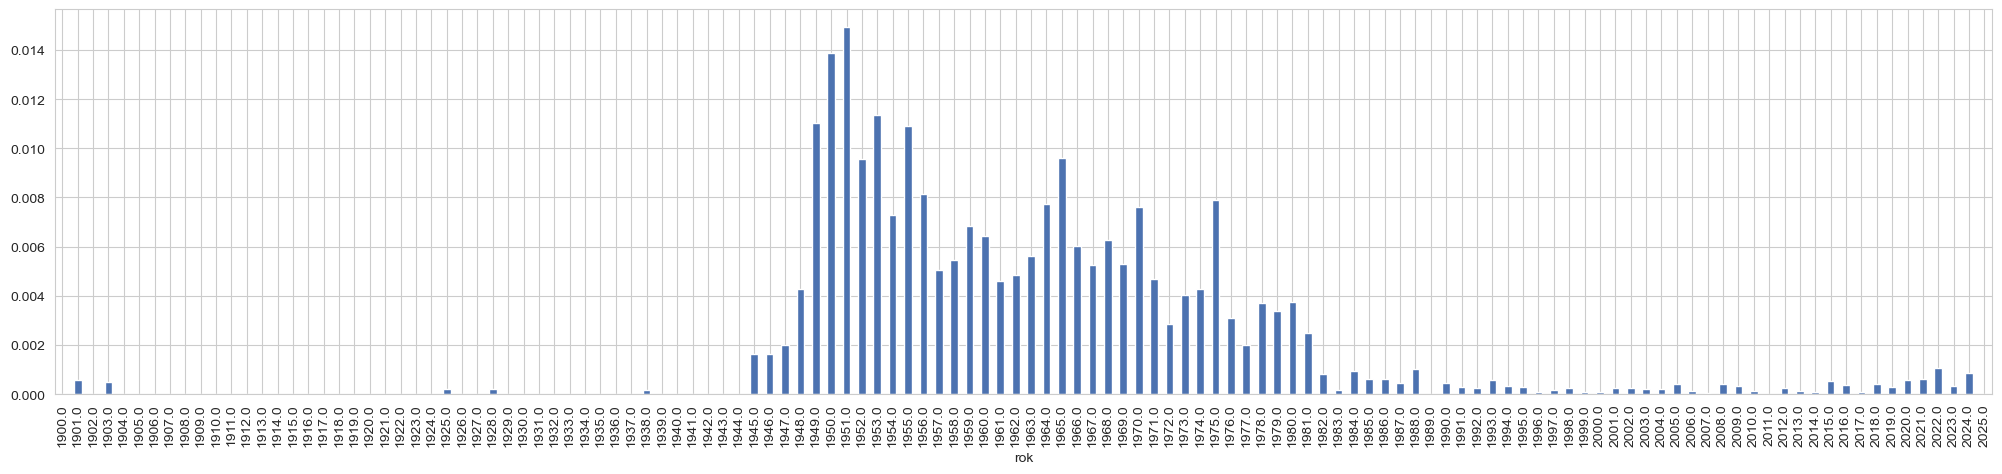

In [414]:
okup = df2[(df2.apply(lambda row: any(" okup" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
okup.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

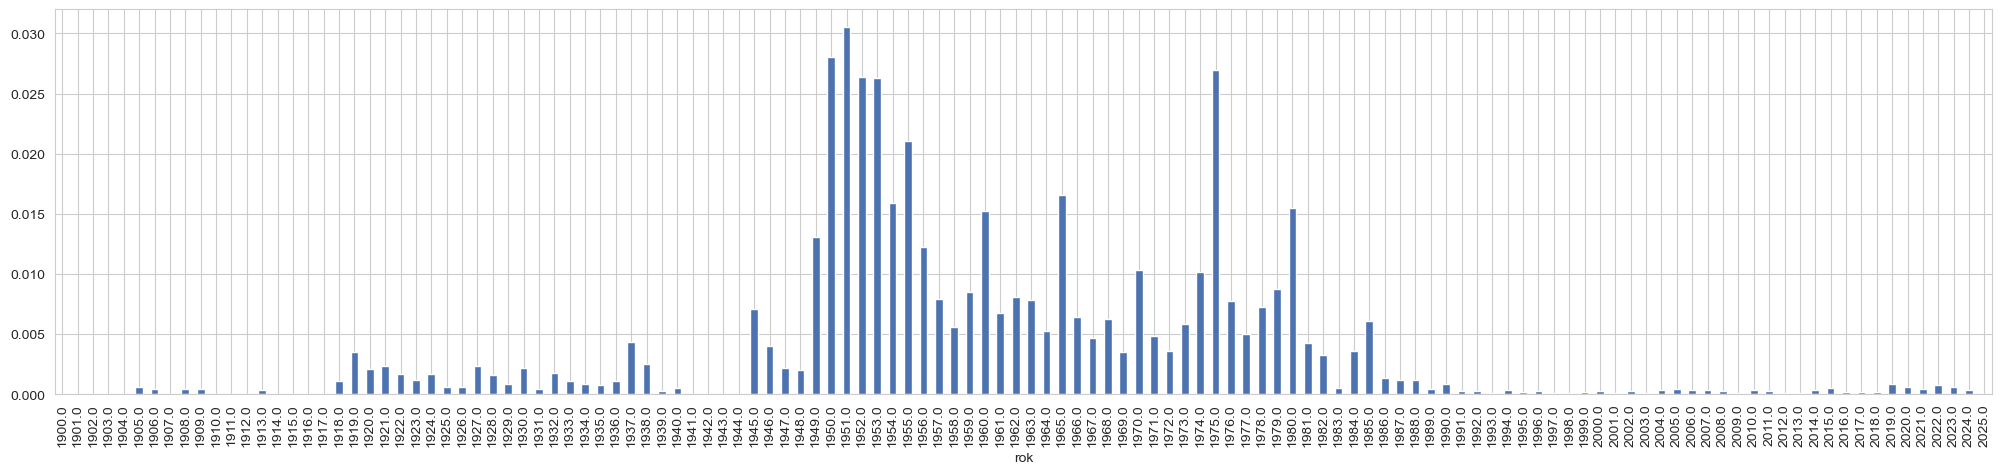

In [415]:
osvo = df2[(df2.apply(lambda row: any(" osvo" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
osvo.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

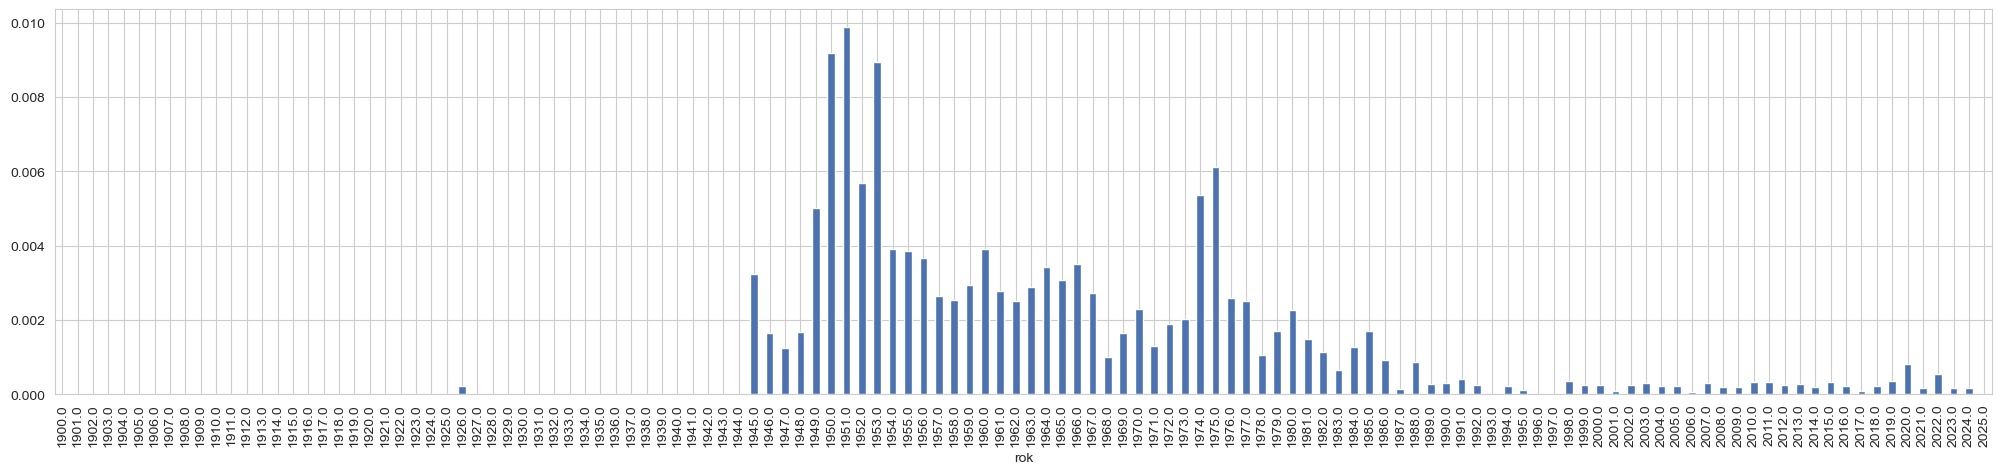

In [418]:
partyz = df2[(df2.apply(lambda row: any("partyz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
partyz.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

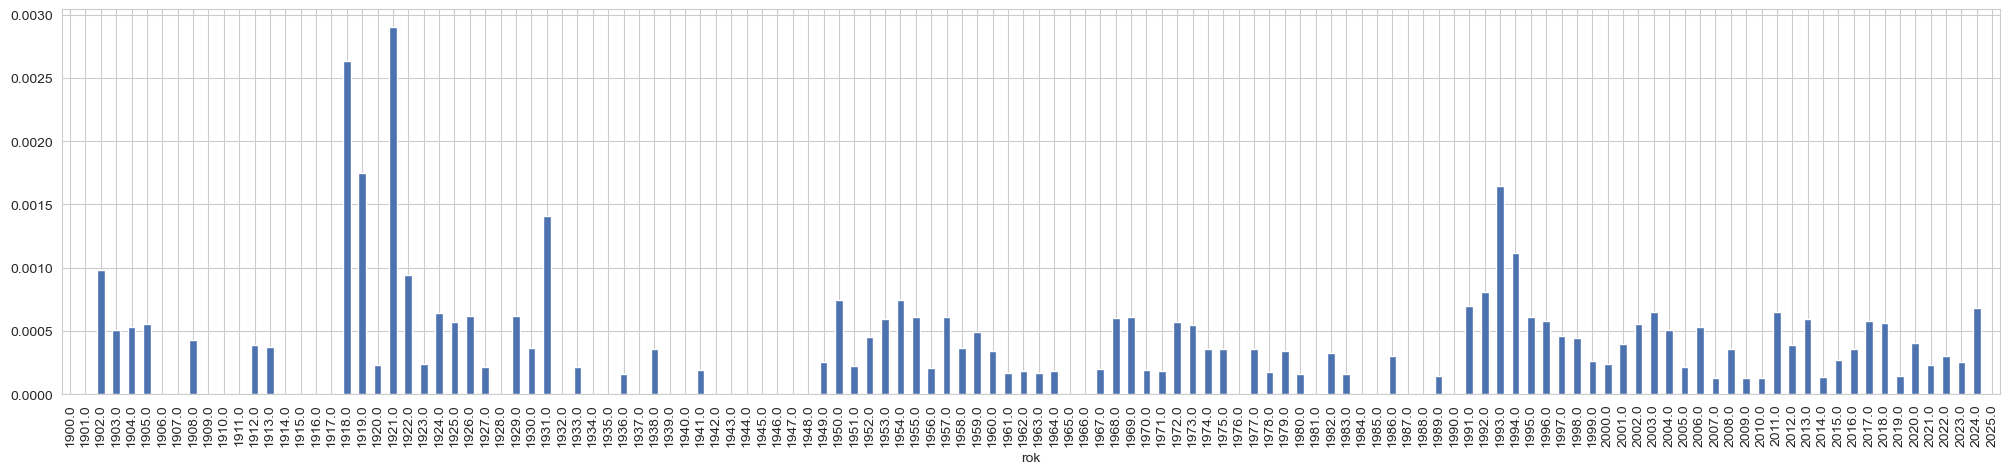

In [420]:
habsbur = df2[(df2.apply(lambda row: any("habsbur" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
habsbur.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

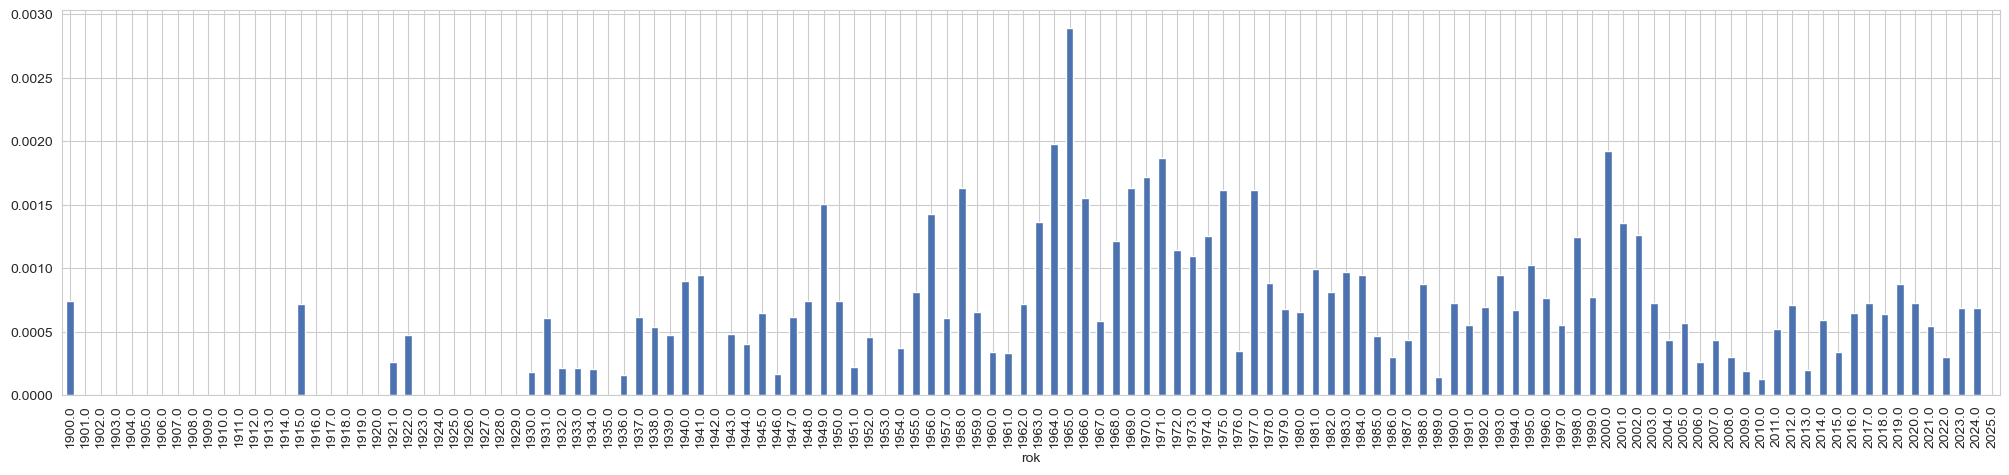

In [422]:
kutil = df2[(df2.apply(lambda row: any("kutil" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
kutil.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

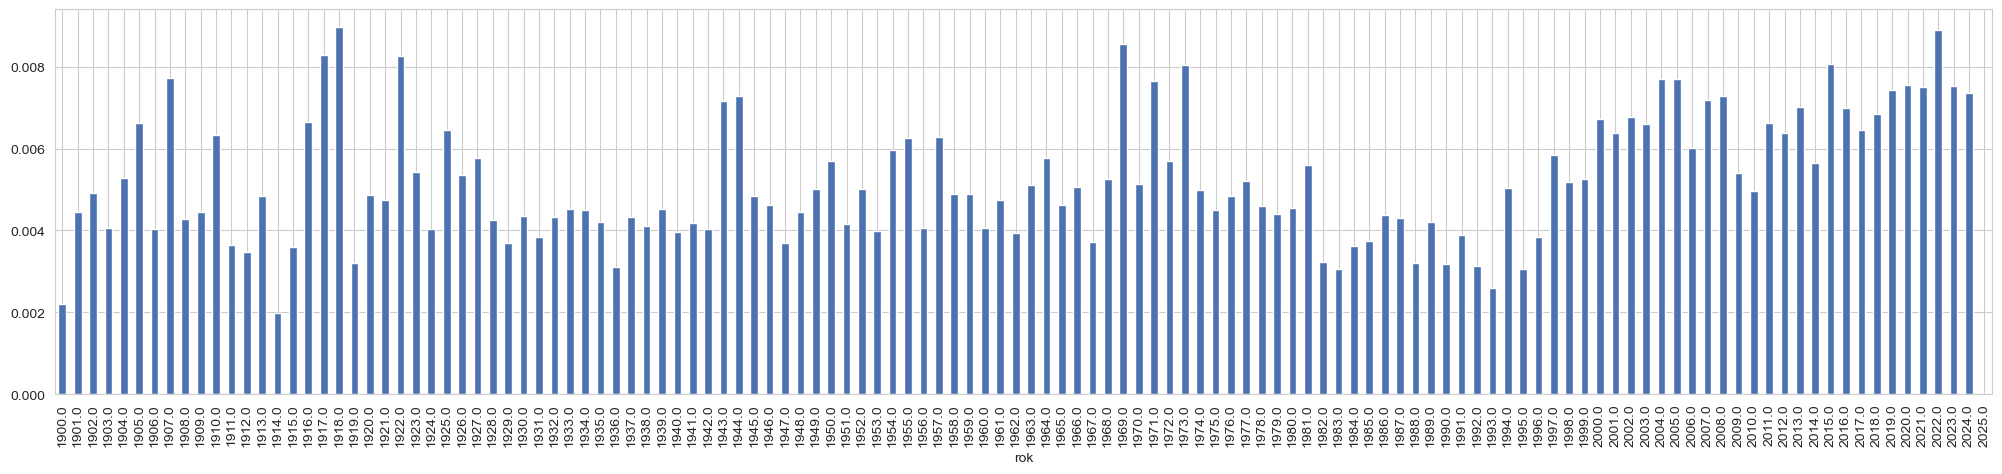

In [430]:
bazen = df2[(df2.apply(lambda row: any("bazén" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("zahrad" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
bazen.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

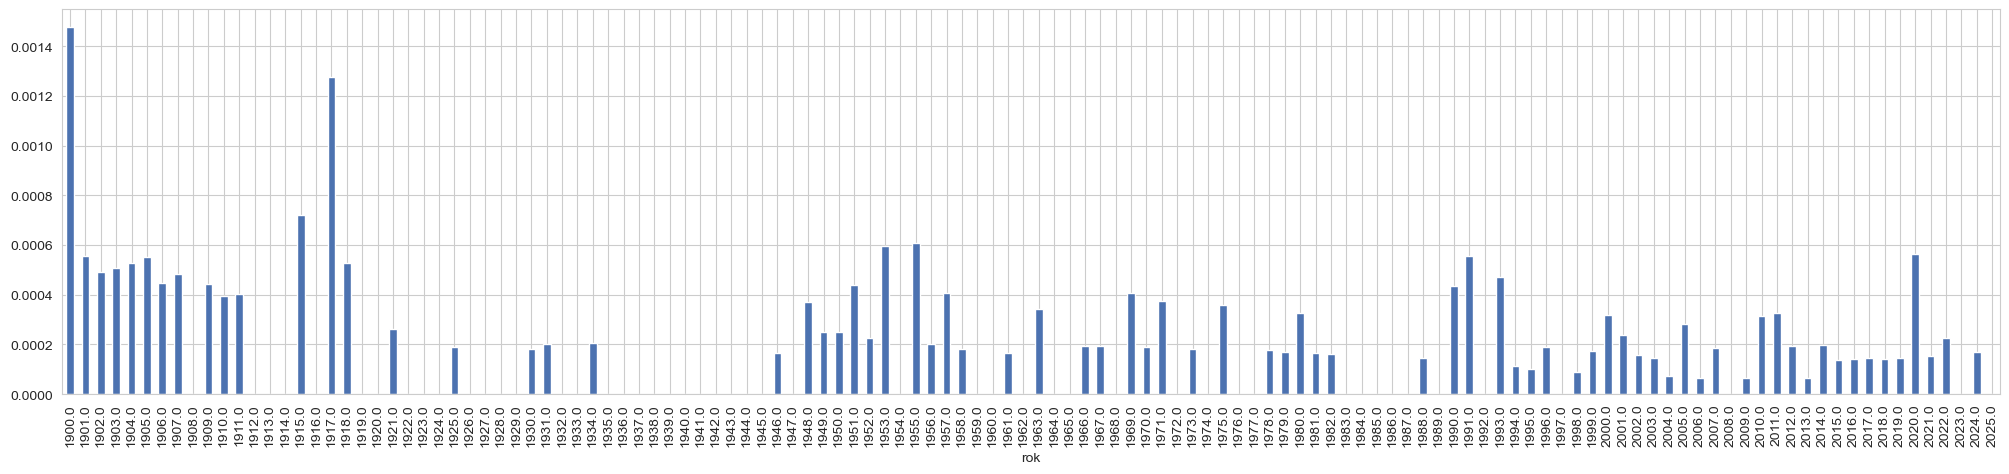

In [436]:
alpy = df2[(df2.apply(lambda row: any("Alpy" in str(value) for value in row), axis=1)) | (df2.apply(lambda row: any("Alpá" in str(value) for value in row), axis=1)) | (df2.apply(lambda row: any(" alpsk" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
alpy.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

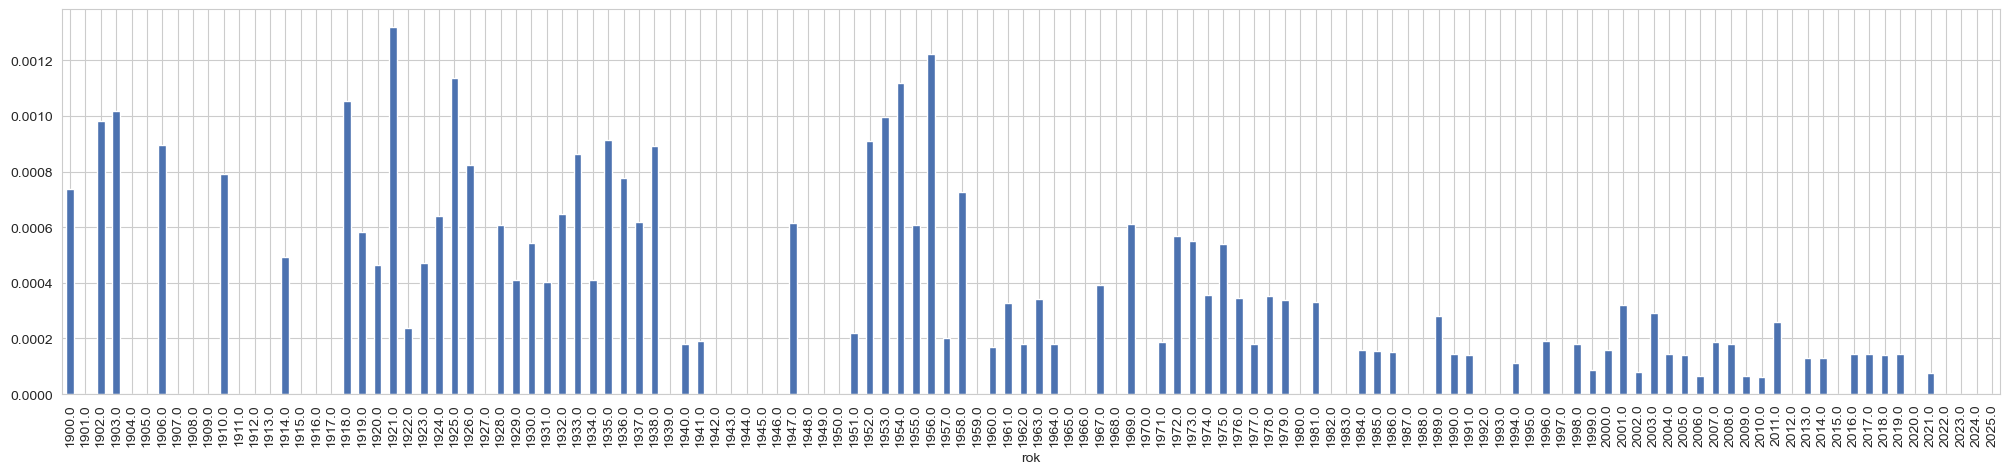

In [437]:
tatry = df2[(df2.apply(lambda row: any("Tatry" in str(value) for value in row), axis=1)) | (df2.apply(lambda row: any("Tatrá" in str(value) for value in row), axis=1)) | (df2.apply(lambda row: any("tatrans" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
tatry.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

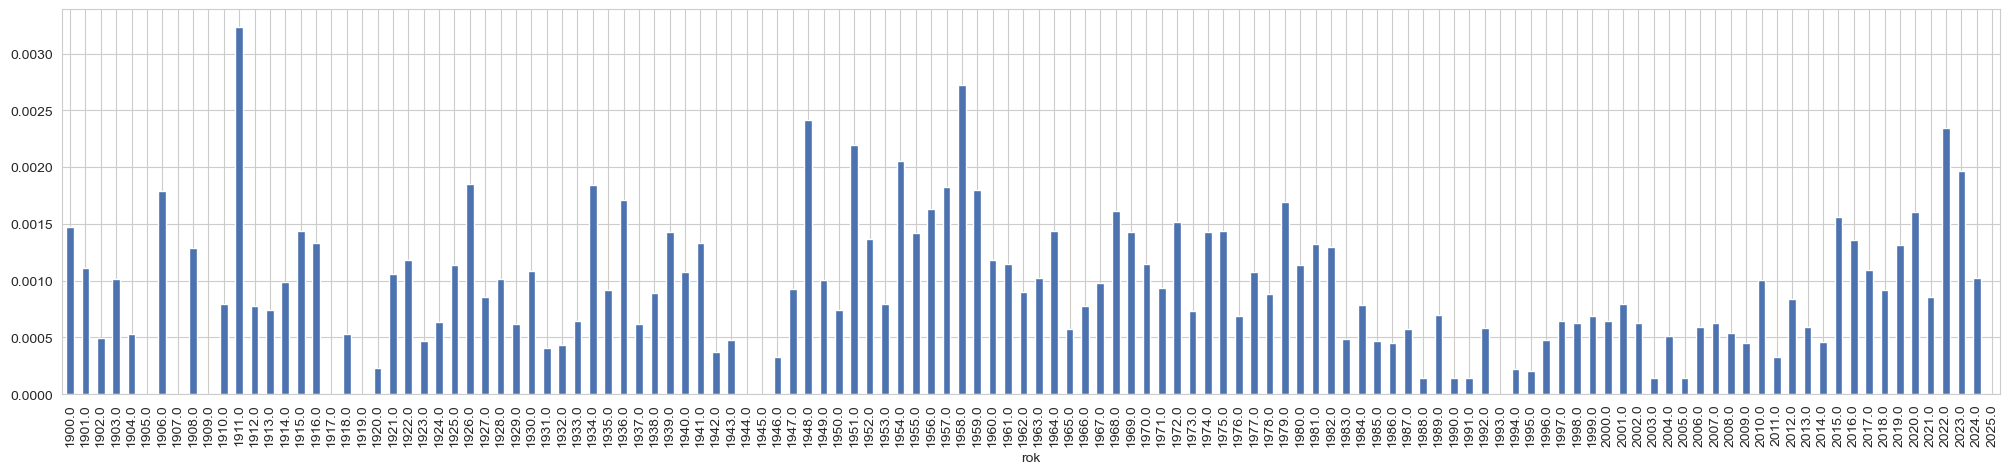

In [439]:
krkono = df2[(df2.apply(lambda row: any("krkono" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
krkono.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

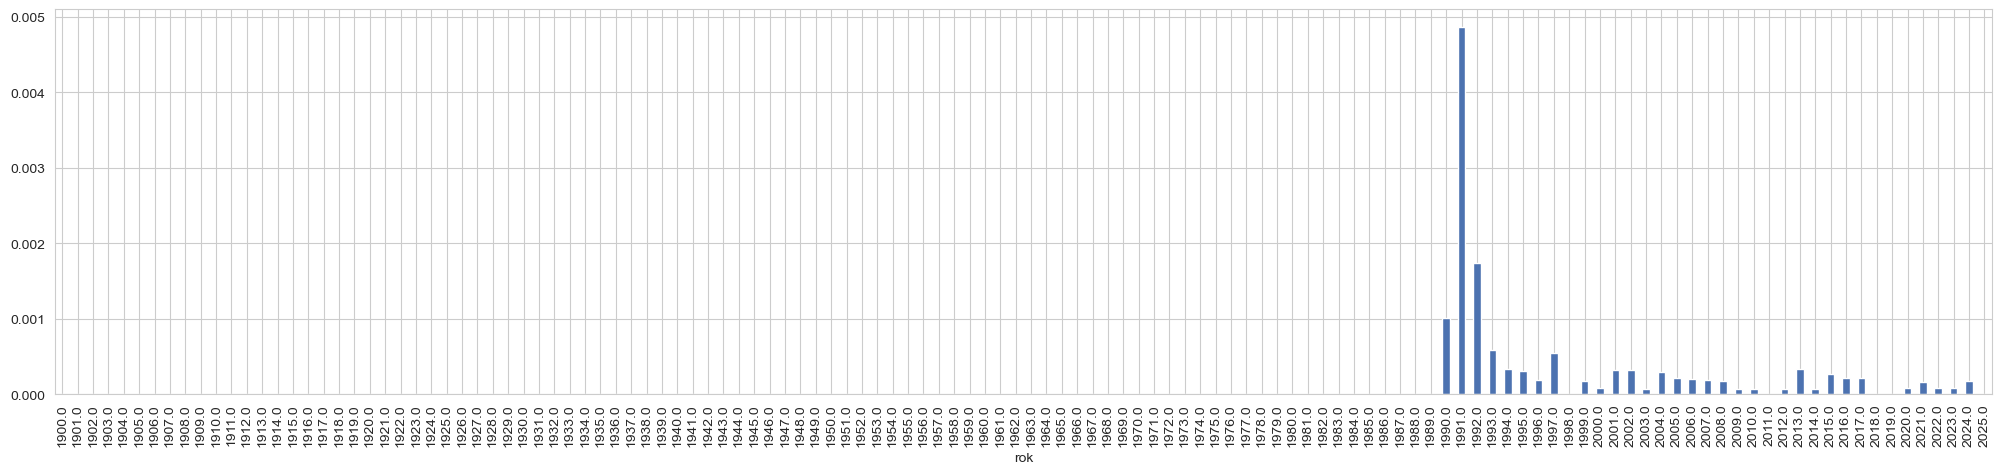

In [455]:
privatiz = df2[(df2.apply(lambda row: any("privatiz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
privatiz.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

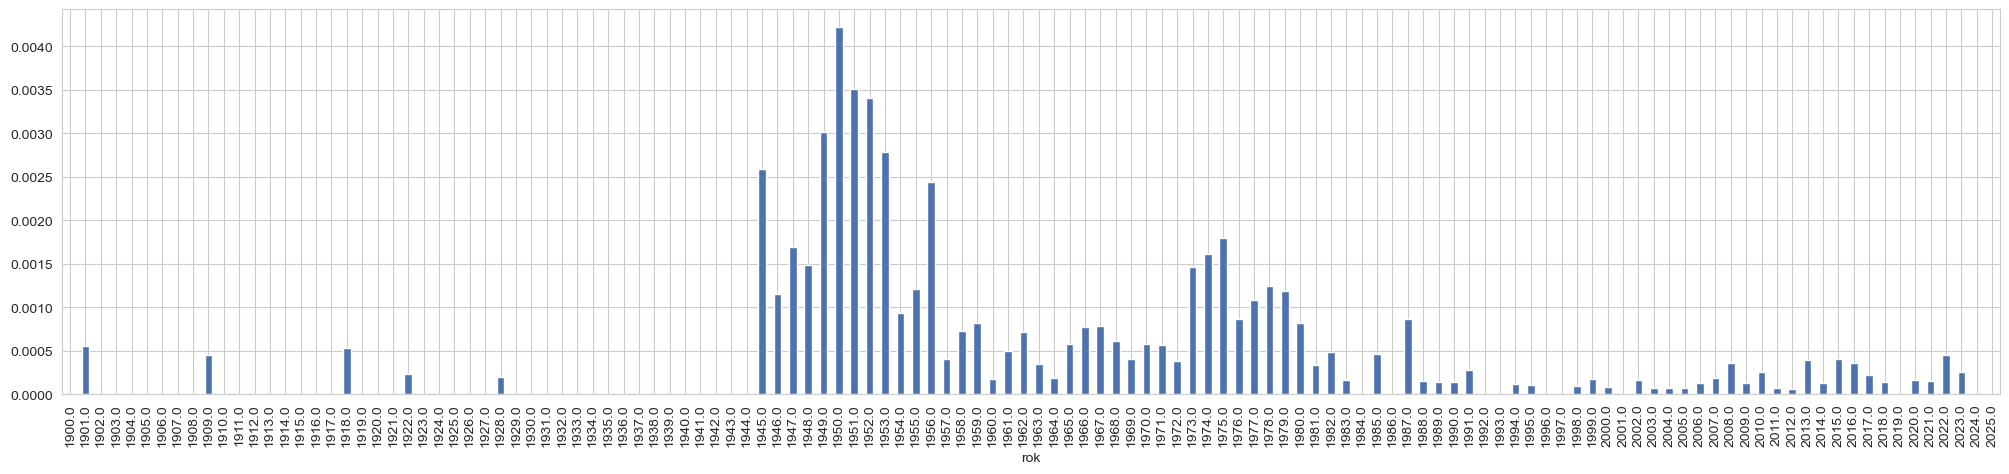

In [489]:
znarod = df2[(df2.apply(lambda row: any("znárod" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("kolektiviz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
znarod.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

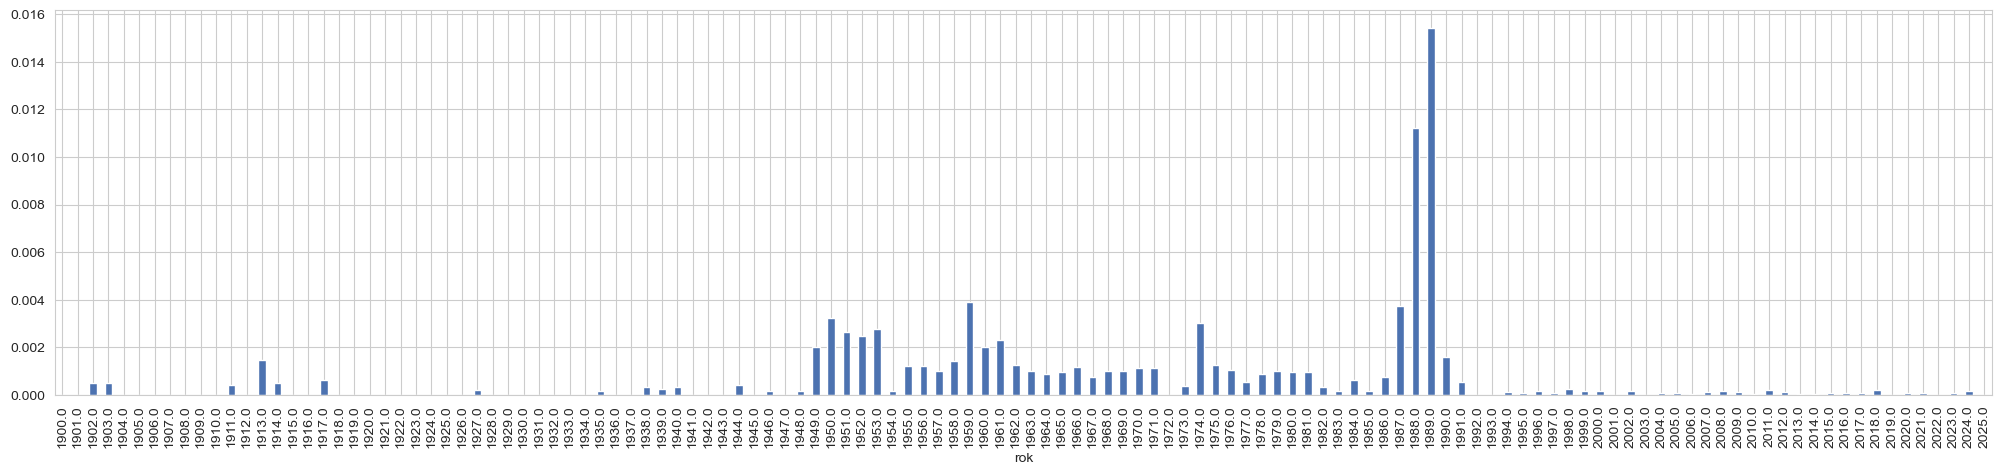

In [490]:
prestavb = df2[(df2.apply(lambda row: any("přestavb" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("perestroj" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
prestavb.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

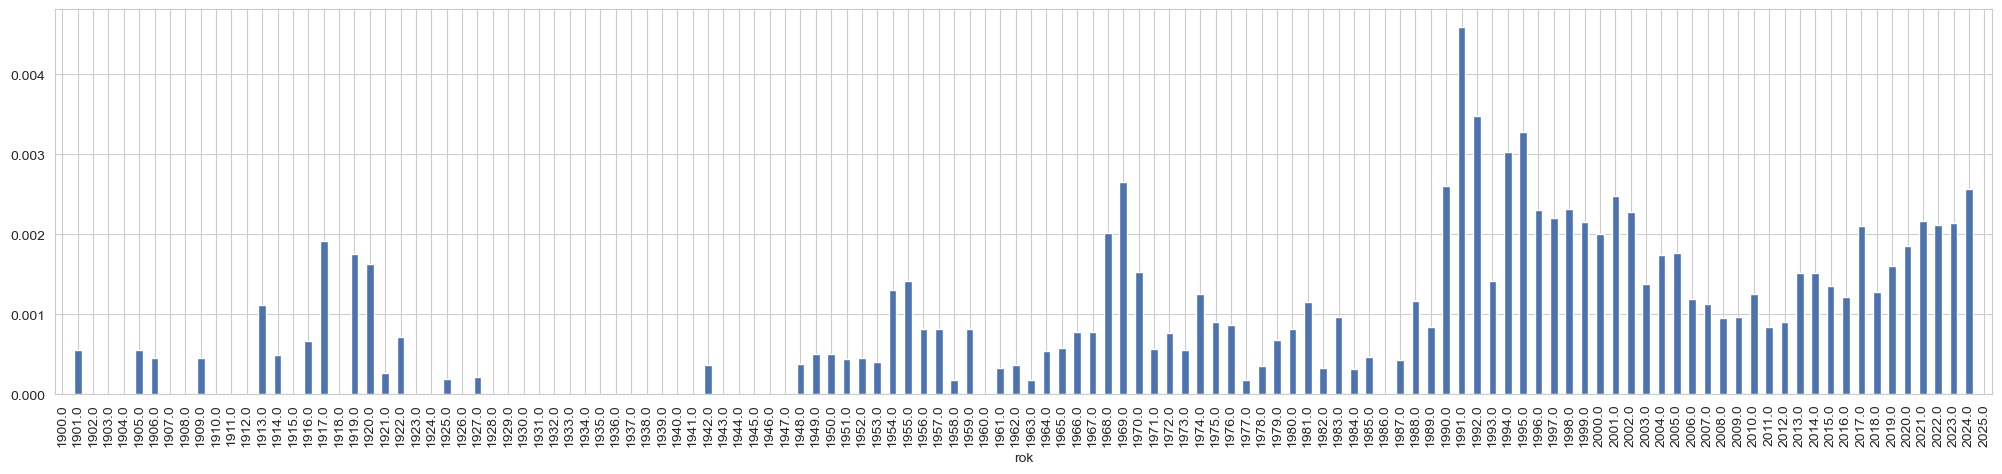

In [501]:
transform = df2[(df2.apply(lambda row: any("transforma" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
transform.plot.bar(figsize=(25,5))

In [ ]:
# Create a list of terms to search for
search_terms = ["reforma", "reformy"]

# Modified code to check for multiple terms
reform = df2[(df2.apply(lambda row: any(term in str(value).lower() 
                                      for value in row 
                                      for term in search_terms), axis=1))].groupby('rok').size() / df.groupby('rok').size()

# Create the bar plot
reform.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

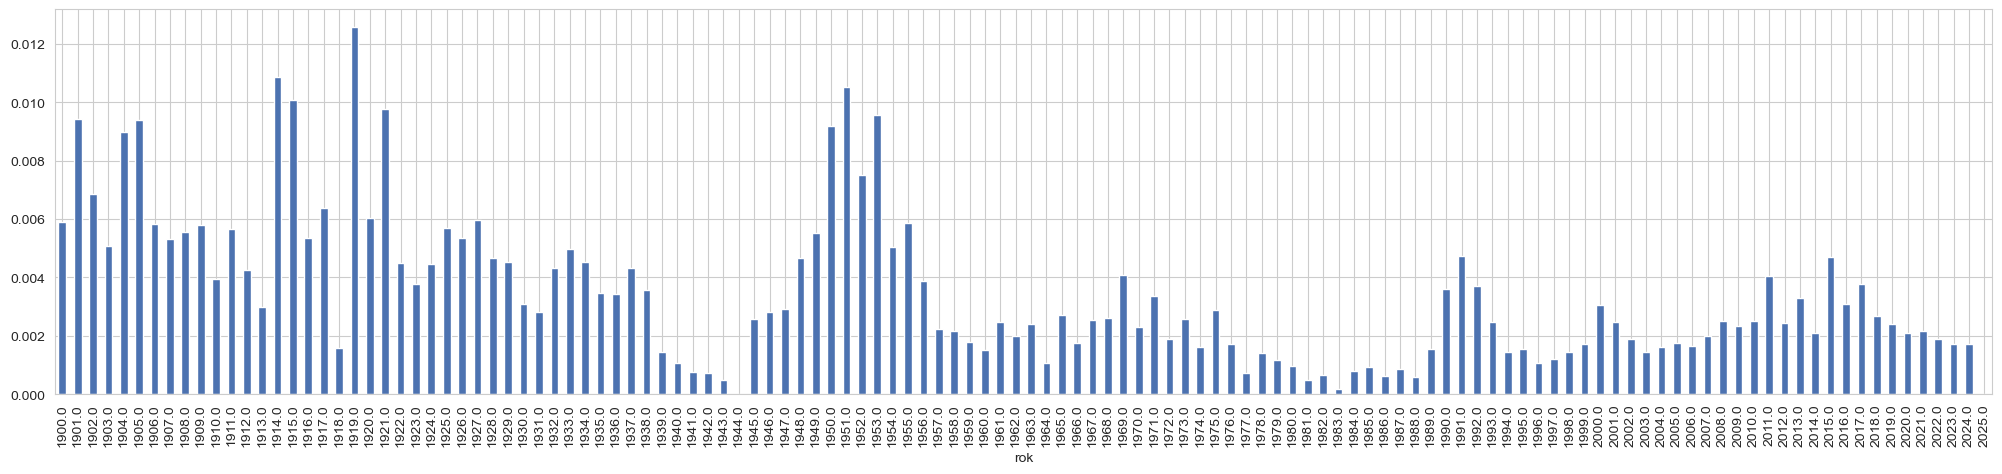

In [545]:
reformy = df2[(df2.apply(lambda row: any("reform" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
reformy.plot.bar(figsize=(25,5))

<Figure size 640x480 with 0 Axes>

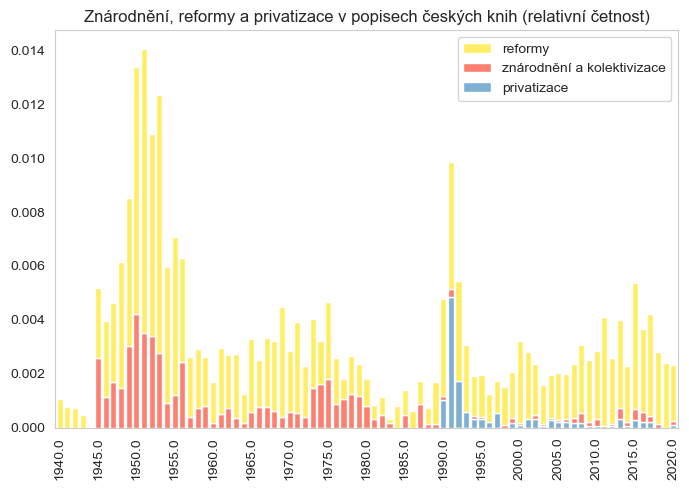

In [553]:
plt.figure()

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'privatizace': privatiz, 'znárodnění a kolektivizace': znarod, 'reformy': reformy}).tail(86).head(81)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    width=0.8,
    color = ["#7eb0d5", "#fd7f6f", "#ffee65"]
)
ax.grid(False)

# Customize the chart
plt.title('Znárodnění, reformy a privatizace v popisech českých knih (relativní četnost)')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper right', reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<Axes: xlabel='rok'>

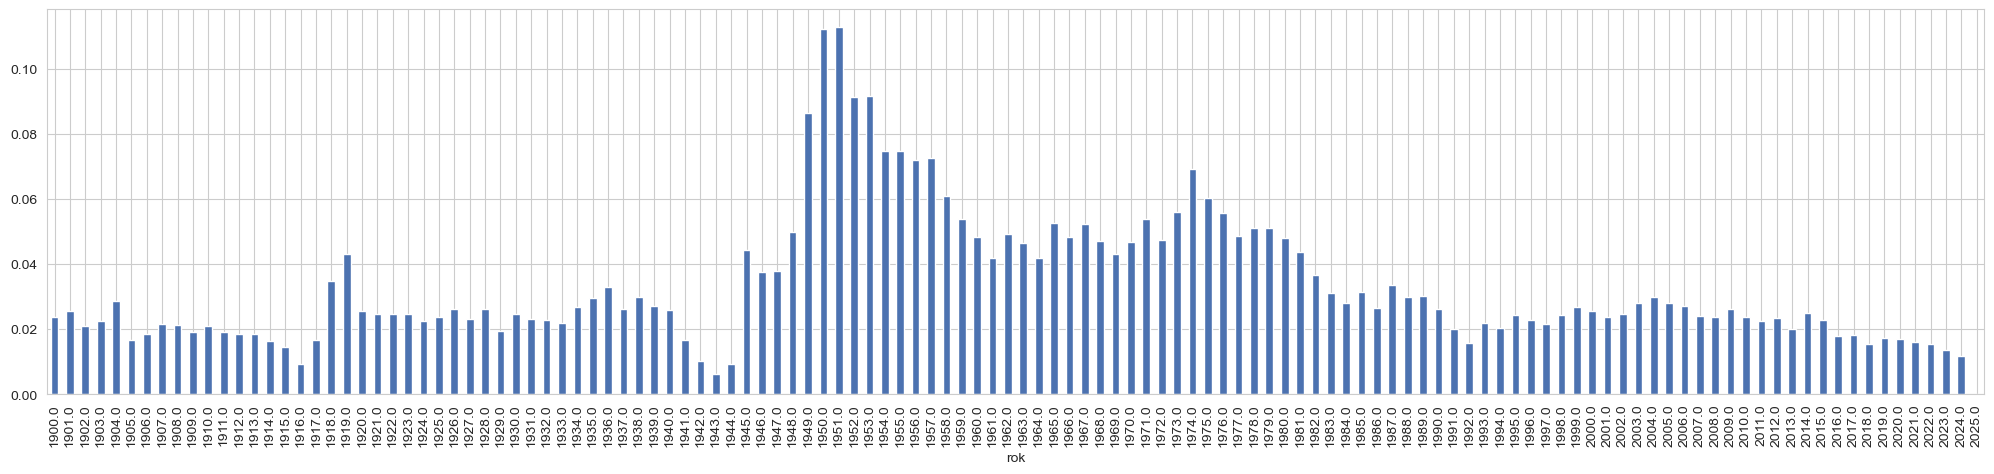

In [517]:
narod = df2[(df2.apply(lambda row: any("národ" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
narod.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

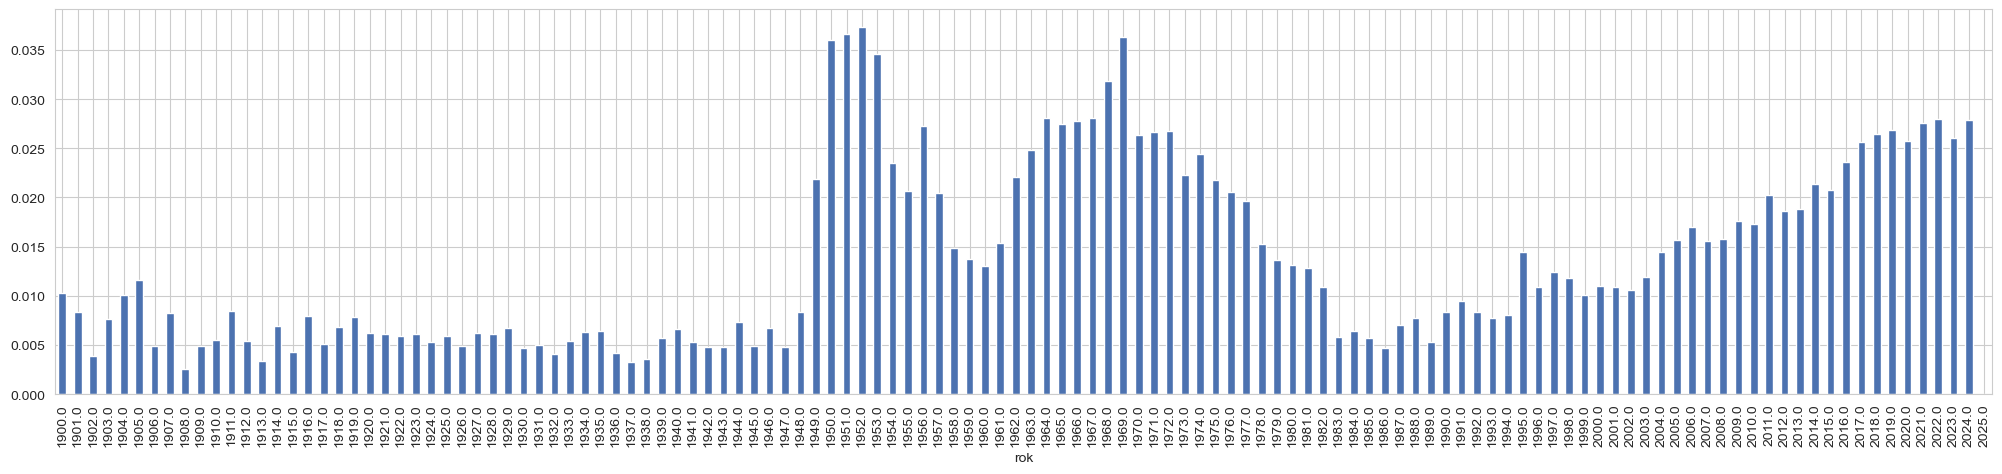

In [518]:
clovek = df2[(df2.apply(lambda row: any("člověk" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
clovek.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

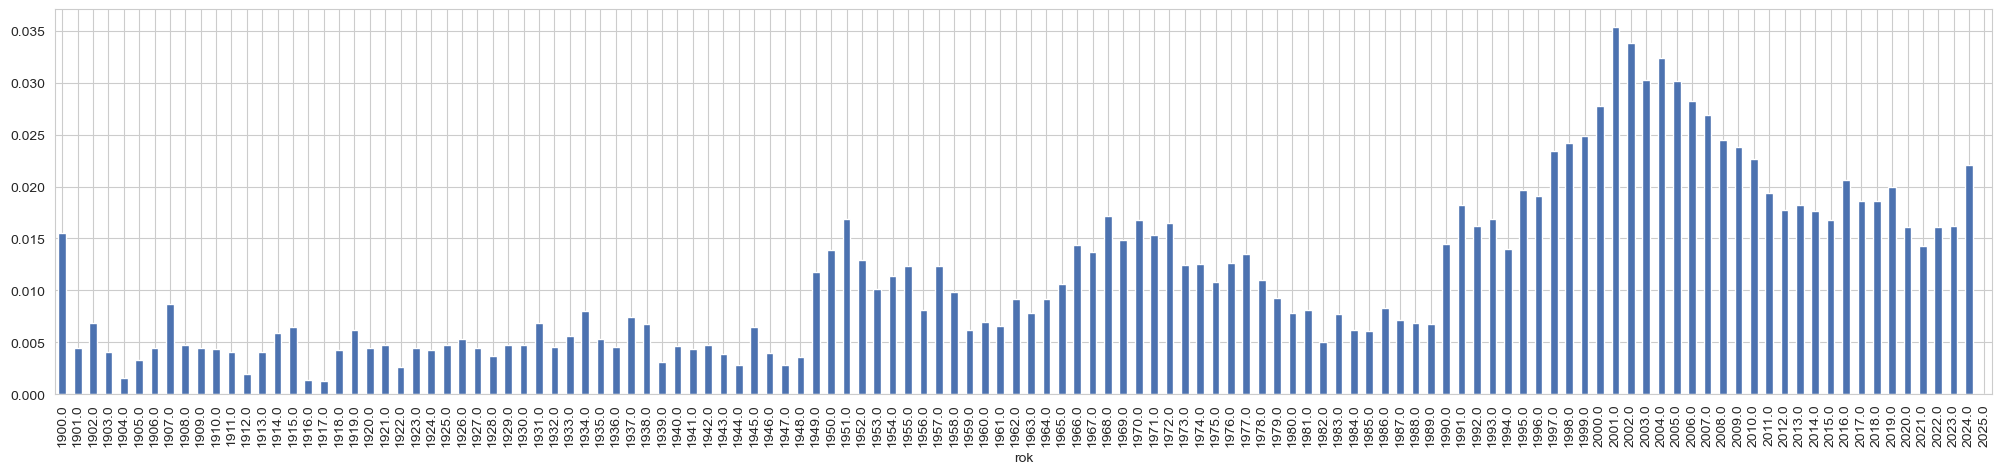

In [521]:
evrop = df2[(df2.apply(lambda row: any("evrop" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
evrop.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

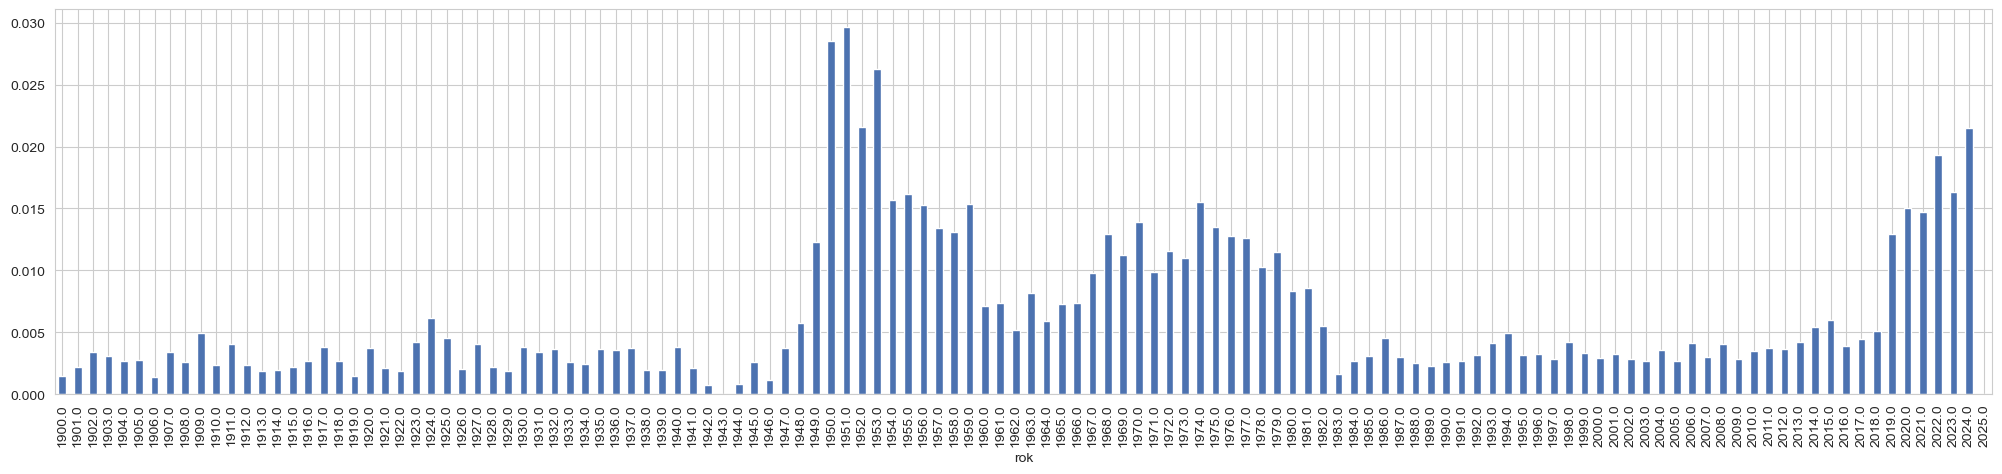

In [523]:
rodin = df2[(df2.apply(lambda row: any(" rodin" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
rodin.plot.bar(figsize=(25,5))

<Figure size 640x480 with 0 Axes>

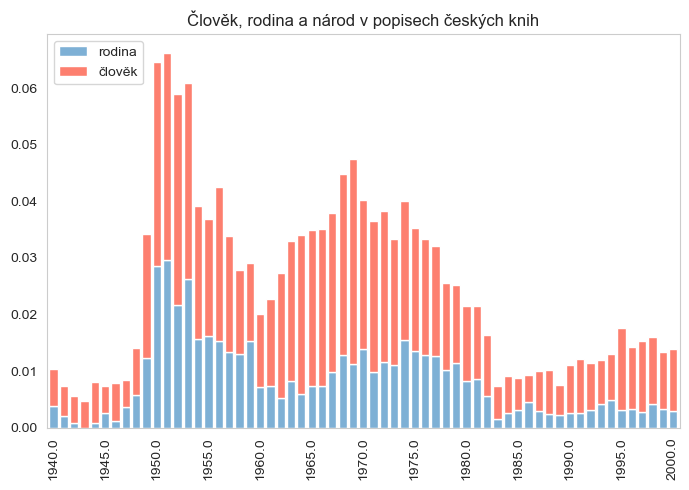

In [527]:
plt.figure()

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'rodina': rodin, 'člověk': clovek}).tail(86).head(61)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(7, 5),
    width=0.8,
    color = ["#7eb0d5", "#fd7f6f", "#ffee65"]
)
ax.grid(False)

# Customize the chart
plt.title('Člověk, rodina a národ v popisech českých knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper left')

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<Axes: xlabel='rok'>

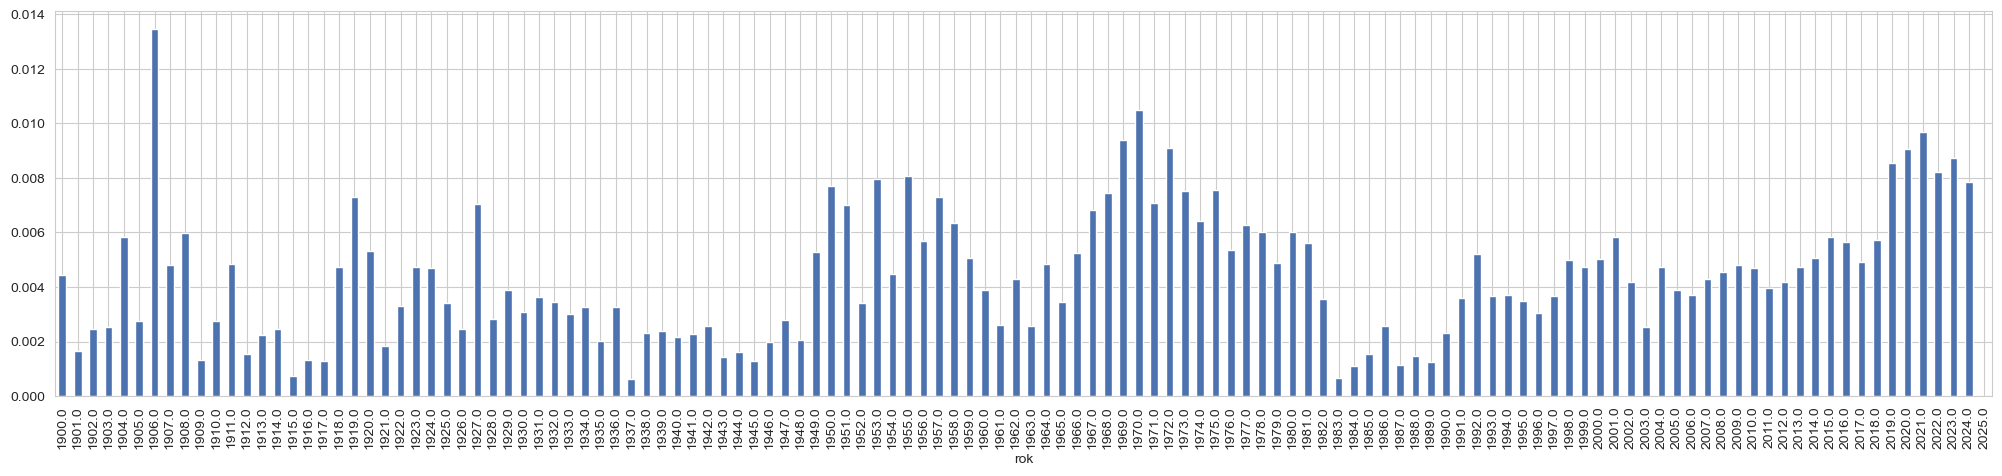

In [529]:
manzel = df2[(df2.apply(lambda row: any("manžel" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
manzel.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

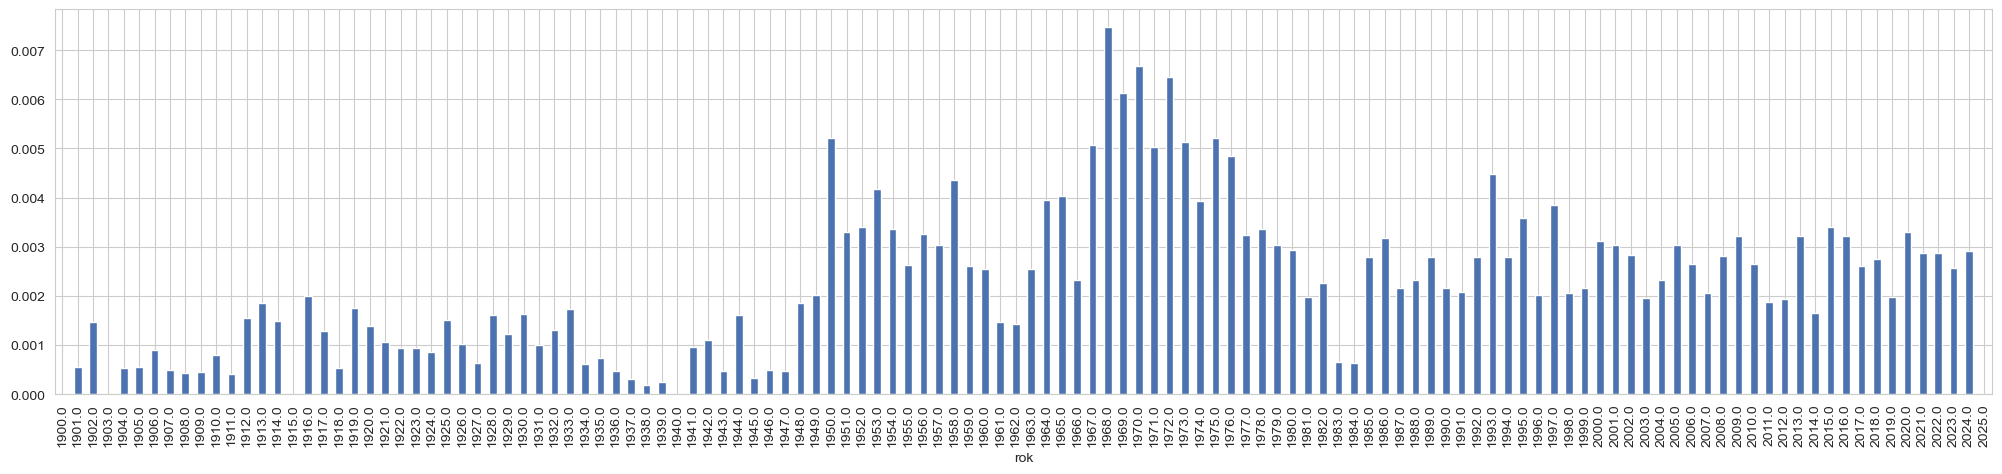

In [531]:
milen = df2[(df2.apply(lambda row: any(" milen" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
milen.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

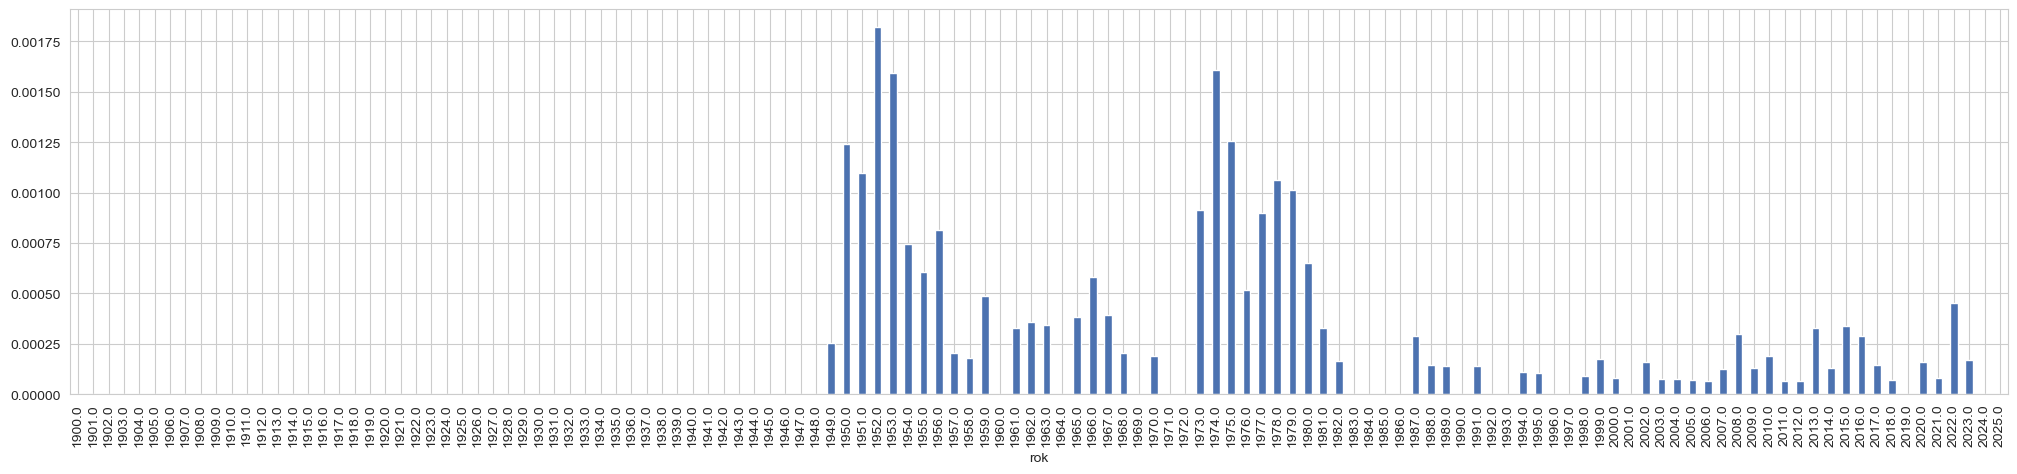

In [461]:
kolektiviz = df2[(df2.apply(lambda row: any("kolektiviz" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
kolektiviz.plot.bar(figsize=(25,5))

In [446]:
df2[(df2.apply(lambda row: any("šumav" in str(value).lower() for value in row), axis=1))].sample(20)

,rok,072_x,245_a,245_c,520_a,650_a,653_a,655_a,964_a
001,,,,,,,,,
bk194901233,1948,None,Jihozápadní Čechy ;,Rudolf Máša,None,None,None,None,['Čechy jihozápadní - průvodce' 'Šumava severo...
nkc20122371869,2012,['Česká próza' 'Biografie'],Vzpomínky na Šumavu.,Karel Klostermann ; [ediční práce Jaroslava Ja...,None,['čeští spisovatelé' 'každodenní život' 'Czech...,None,['české prózy' 'autobiografické vzpomínky' 'Cz...,None
nos190103014,1911,"['Geografie Česka a Slovenska, reálie, cestová...",Šumava :,Jos. Bělohlav,None,None,None,['turistické průvodce'],None
nkc20132528562,2013,['Fotografie. Fotografické postupy'],Zaznamenejte krásy Pošumaví :,[autor Roman Muchka],None,['fotografování' 'fotografické techniky' 'digi...,None,['přednášky' 'sborníky' 'lectures' 'papers'],None
cpk20041490354,2001,['Životní prostředí a jeho ochrana'],Plán péče Národního parku Šumava :,"[autorský kolektiv Bufka, Luděk ... et al.]",None,['národní parky' 'ochrana přírody' 'national p...,None,['zprávy' 'reports'],None
nkc20051582347,2005,['Archeologie'],Keltové na Šumavě :,Miloslav Slabina,None,['archeologické výzkumy' 'hradiště' 'Keltové' ...,None,['populárně-naučné publikace' 'popular works'],None
bk193400287,1934,"['Francouzská próza, francouzsky psaná']",Burští hrdinové :,Louis Boussenard ; [překlad V. Beneš-Šumavský ...,None,None,None,['francouzské romány' 'dobrodružné romány'],None
bk195600462,1955,['Česká próza'],Ze světa lesních samot /,Karel Klostermann,['Děj prvního Klostermannova románu (1. vydání...,None,None,['české romány' 'Czech fiction'],None
nkc20091995178,2009,['Životní prostředí a jeho ochrana'],Zakázaná Šumava =,[fotografie] Vladimír Kunc ; [úvodní slovo Vla...,None,['národní parky' 'national parks'],None,['fotografické publikace' 'photographical works'],None


<Axes: xlabel='rok'>

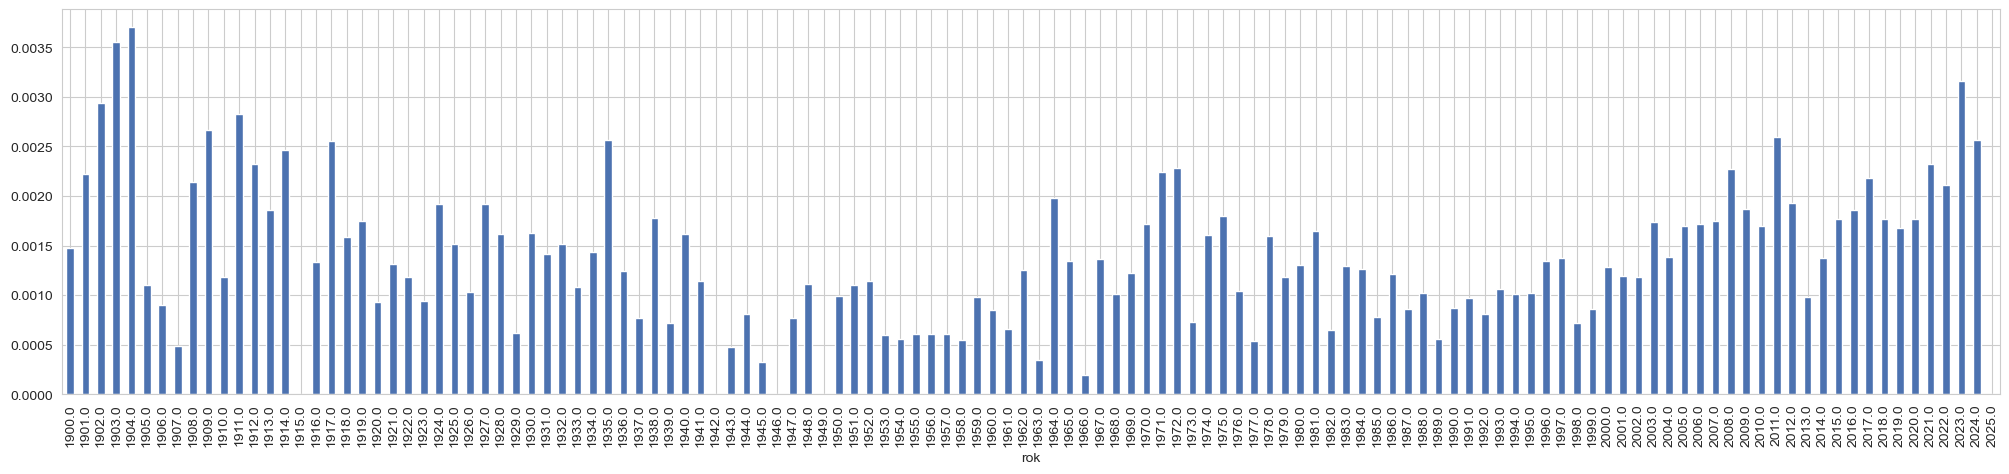

In [441]:
sumav = df2[(df2.apply(lambda row: any("šumav" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
sumav.plot.bar(figsize=(25,5))

<Figure size 640x480 with 0 Axes>

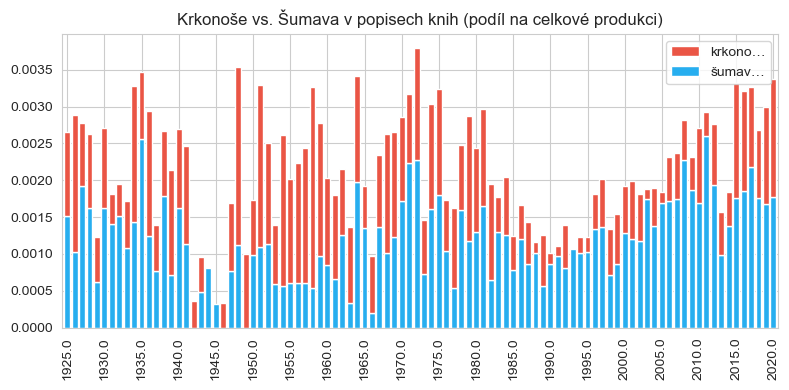

In [450]:
plt.figure()

# Set Seaborn style
# sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'šumav…': sumav, 'krkono…': krkono}).tail(101).head(96)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)
# ax.grid(False)

# Customize the chart
plt.title('Krkonoše vs. Šumava v popisech knih (podíl na celkové produkci)')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<Axes: xlabel='rok'>

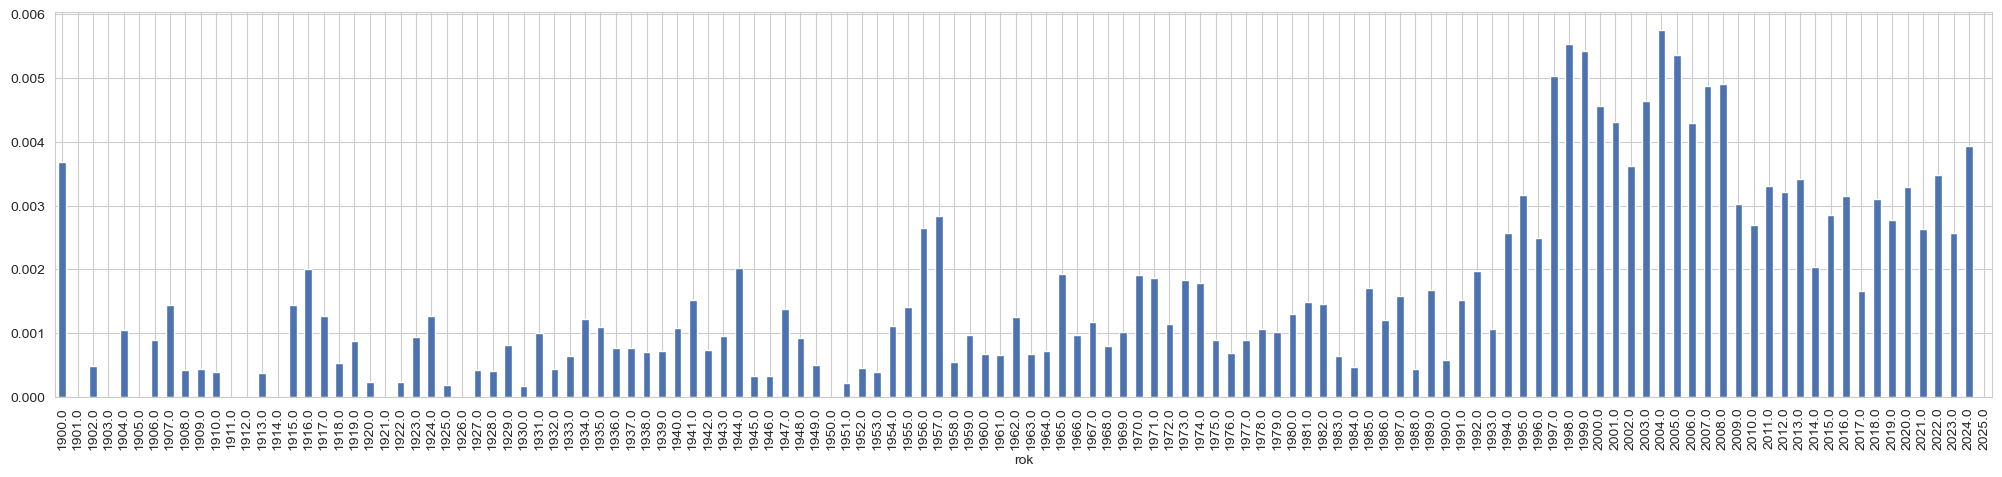

In [423]:
zahradkar = df2[(df2.apply(lambda row: any("zahrádkář" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
zahradkar.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

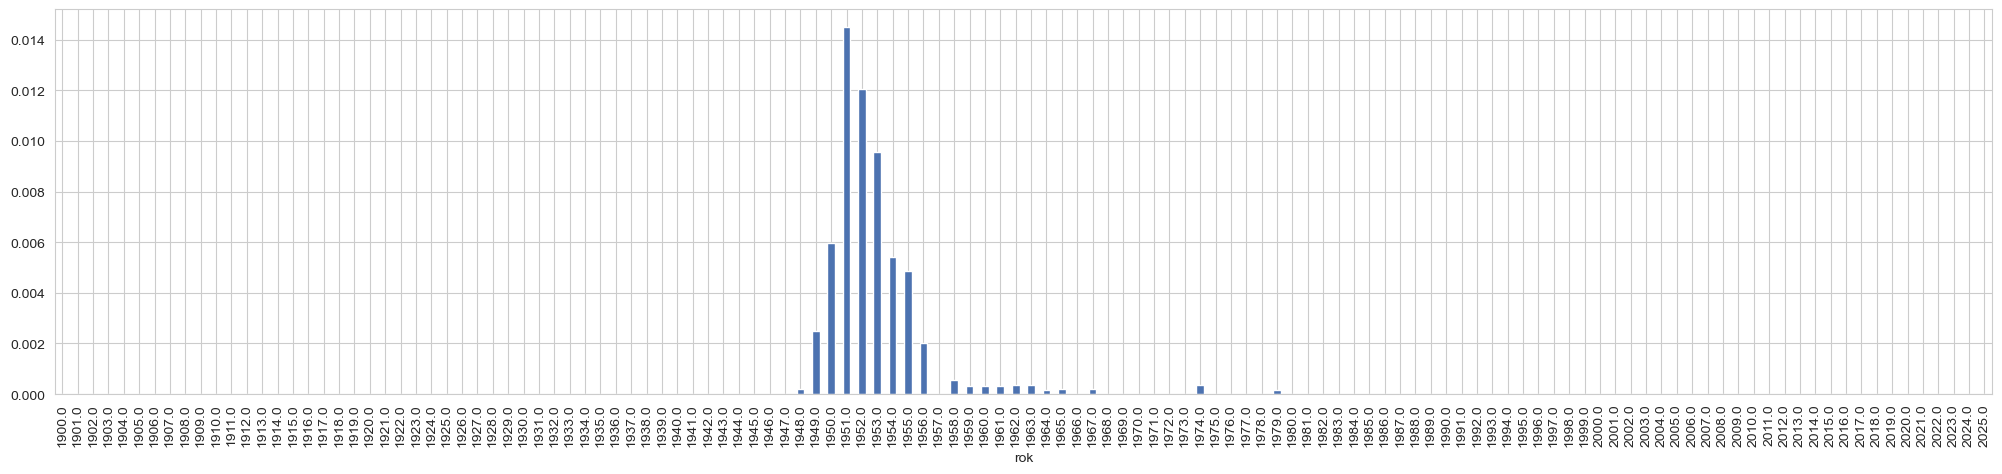

In [555]:
kolchozn = df2[(df2.apply(lambda row: any("kolchozn" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
kolchozn.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

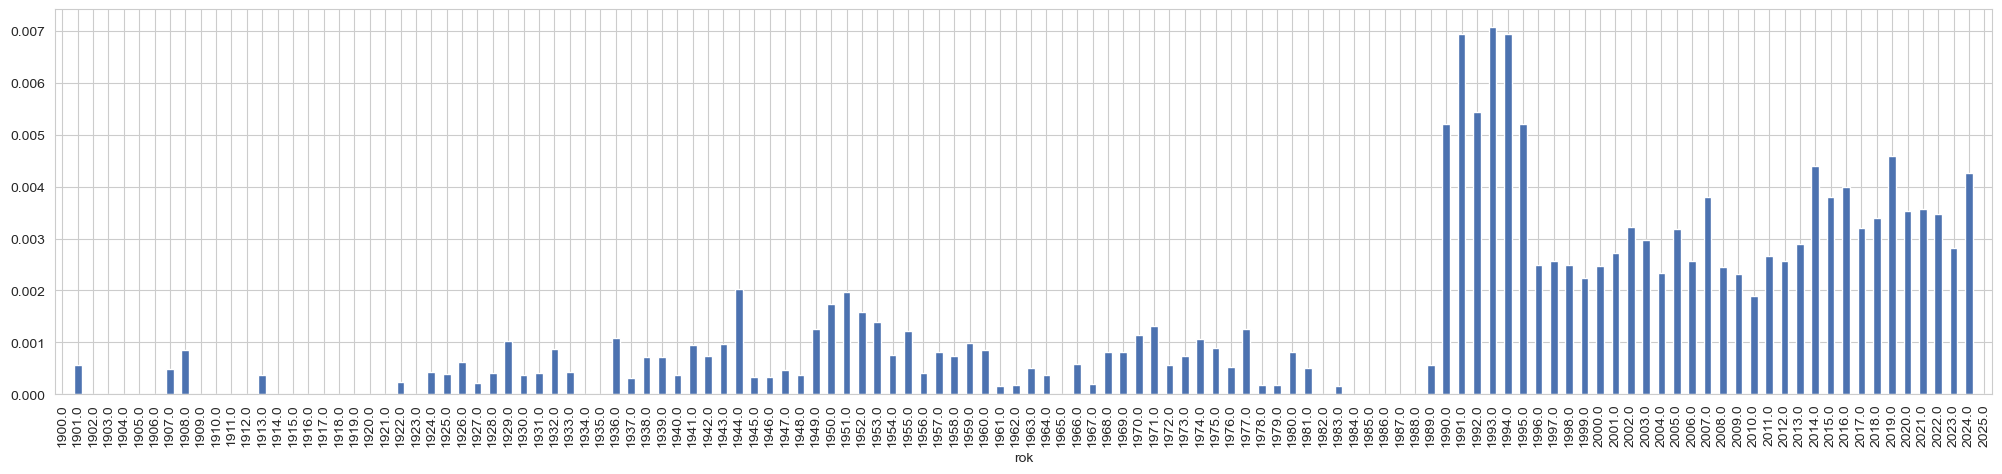

In [425]:
podnikatel = df2[(df2.apply(lambda row: any("podnikatel" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
podnikatel.plot.bar(figsize=(25,5))

In [367]:
zhub = df2[(df2.apply(lambda row: any("zhubnout" in str(value).lower() for value in row), axis=1)) | (df2.apply(lambda row: any("junák" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()
prib = df2[(df2.apply(lambda row: any("přibrat" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Figure size 640x480 with 0 Axes>

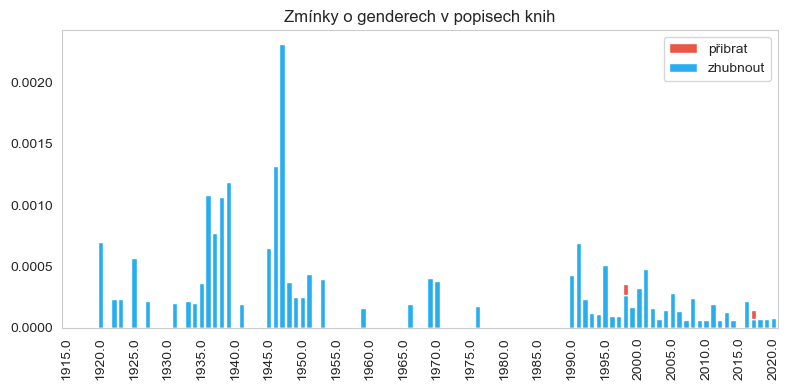

In [368]:
plt.figure()

# Set Seaborn style
# sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'zhubnout': zhub, 'přibrat': prib}).tail(111).head(106)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 4),
    width=0.8,
    color = ['#27aeef', '#ea5545','#ef9b20']
)
ax.grid(False)

# Customize the chart
plt.title('Zmínky o genderech v popisech knih')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc="upper right", reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

In [ ]:
zbohatn = df2[(df2.apply(lambda row: any("zbohatn" in str(value).lower() for value in row), axis=1))].groupby('rok').size() / df.groupby('rok').size()

<Axes: xlabel='rok'>

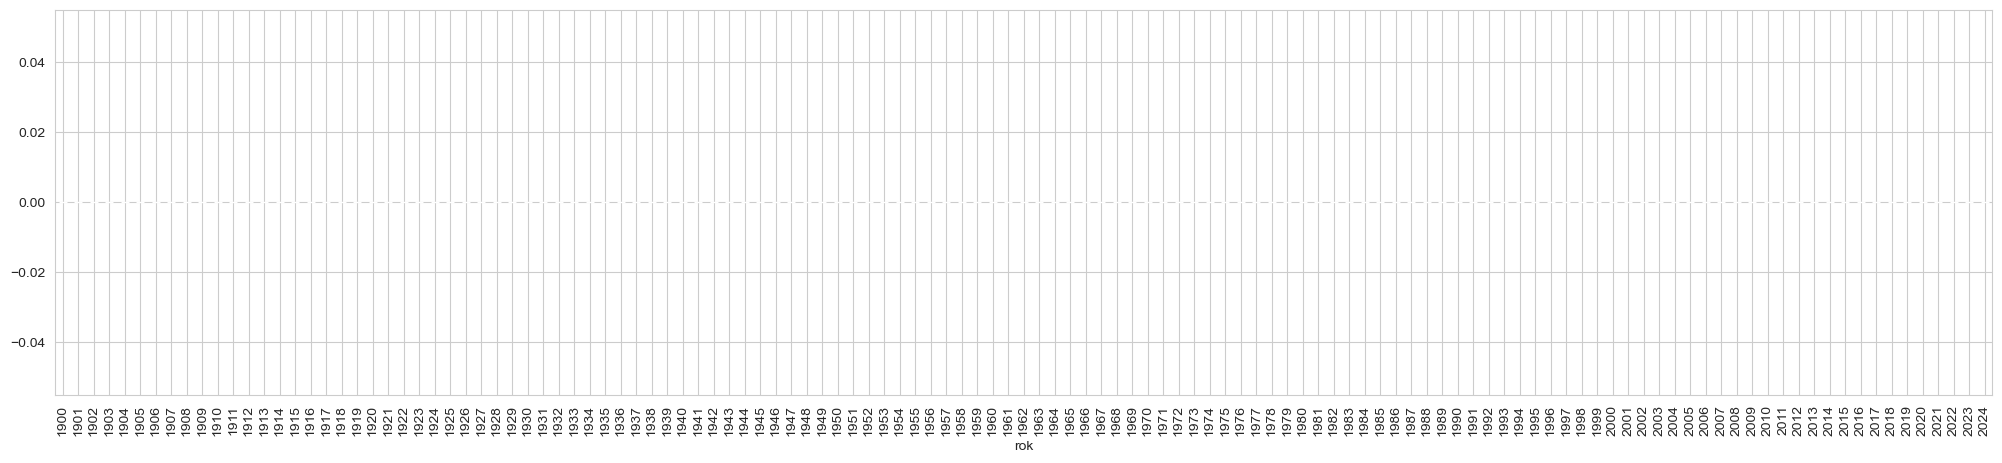

In [283]:
r(df2[df2.apply(lambda row: any("komunis" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("baseball" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("sex" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("feminism" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("gender" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("Windows" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("florbal" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("Nagan" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("Stalin" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("marx" in str(value).lower() for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("Pelé" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("Hitler" in str(value) for value in row), axis=1)])

In [ ]:
r(df2[df2.apply(lambda row: any("Google" in str(value) for value in row), axis=1)])